# COVID-19 járvány terjedésének előrejelzése Közép-Kelet Európában Facebook mobilitási adatok segítségével

In [1]:
# Vizsgált országok: Covid-19 adatok és adatkeretek létrehozása

'''
Albánia, Bulgária, Görögország, Csehország, 
Magyarország, Lengyelország, Románia, Szlovákia, 
Szlovénia, Észtország, Lettország, Litvánia


1, Hungary -     HUN - kész
2, Albánia -     ALB - kész
3, Görögország - GRC - kész
4, Csehország  - CZE - kész
5, Lengyelország - POL - kész
6, Románia - ROU - kész
7, Szlovákia - SVK - kész
8, Szlovénia - SVN - kész
9, Észtország - EST - kész
10,Lettország - LVA - kész
11, Litvánia - LTU - kész
12, Bulgária - BGR - kész
'''

'\nAlbánia, Bulgária, Görögország, Csehország, \nMagyarország, Lengyelország, Románia, Szlovákia, \nSzlovénia, Észtország, Lettország, Litvánia\n\n\n1, Hungary -     HUN - kész\n2, Albánia -     ALB - kész\n3, Görögország - GRC - kész\n4, Csehország  - CZE - kész\n5, Lengyelország - POL - kész\n6, Románia - ROU - kész\n7, Szlovákia - SVK - kész\n8, Szlovénia - SVN - kész\n9, Észtország - EST - kész\n10,Lettország - LVA - kész\n11, Litvánia - LTU - kész\n12, Bulgária - BGR - kész\n'

In [2]:
# A szükséges csomagok betöltése az adatok beolvasásához

import pandas as pd
import numpy as np

In [3]:
# Adatok beolvasása: 2020-as és 2021 év

c_data_all = pd.read_excel(r'C:\Users\Piros\Documents\Corvinus\Szakdolgozat\adatok\covid_19_adatok\owid-covid-data.xlsx', parse_dates=['date'], index_col = 'date')

In [4]:
# az összes sor és összes oszlop megjelenítése

#pd.options.display.max_columns = None # összes oszlop megjelenítése
#pd.options.display.max_rows = None # összes sor megjelenítése

In [5]:
# Az oszlopok neveinek kiírása

c_data_all.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [6]:
# Annak ellenőrzése, hogy az egyes változók hány hiányzó értéket tartalmaznak

c_data_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116102 entries, 2020-02-24 to 2021-09-11
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               116102 non-null  object 
 1   continent                              110785 non-null  object 
 2   location                               116102 non-null  object 
 3   total_cases                            110469 non-null  float64
 4   new_cases                              110466 non-null  float64
 5   new_cases_smoothed                     109451 non-null  float64
 6   total_deaths                           99837 non-null   float64
 7   new_deaths                             99992 non-null   float64
 8   new_deaths_smoothed                    109451 non-null  float64
 9   total_cases_per_million                109886 non-null  float64
 10  new_cases_per_million                  1

In [7]:
# Pozitívitási arány kiszámítása és változóba történő elhelyezése a c_adatok_all adatkeretben-ben a 2020-as évre

c_data_all['covid_positivity_rate'] = c_data_all['new_cases'] / c_data_all['new_tests']

In [8]:
# Halálozási arány kiszámítása és változóba történő elhelyezése a c_adatok_all dataframe-ben

c_data_all['covid_death_rate'] = c_data_all['new_deaths'] / c_data_all['population']

In [9]:
#  a c_data_all adatkeret index típusának ellenőrzése

print(type(c_data_all.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [10]:
# dataframe létrehozása a 2020-as adatokra

c_data_all_2020 = c_data_all.loc['2020-04-01':'2020-12-31']

In [11]:
# dataframe létrehozása a 2021-es adatokra

c_data_all_2021 = c_data_all.loc['2021-01-01':'2021-09-30']

In [12]:
# Minden orszgára létrehozásra kerül a COVID-19 változókkal

# az első sorban szűrűnk az országra, a másodikban a szükséges változókra, míg a harmadik sorban átnevezzük a változókat

In [13]:
# Albánia ALB


c_data_all_filtered_2020_ALB = c_data_all_2020[c_data_all_2020['iso_code'] == 'ALB']

c_data_all_filtered_2020_ALB = c_data_all_filtered_2020_ALB[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_ALB = c_data_all_filtered_2020_ALB.rename(columns={'covid_positivity_rate':'ALB_covid_positivity_rate', 'covid_death_rate':'ALB_covid_death_rate'})


In [14]:
# Bulgária BGR


c_data_all_filtered_2020_BGR = c_data_all_2020[c_data_all_2020['iso_code'] == 'BGR']

c_data_all_filtered_2020_BGR = c_data_all_filtered_2020_BGR[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_BGR = c_data_all_filtered_2020_BGR.rename(columns={'covid_positivity_rate':'BGR_covid_positivity_rate', 'covid_death_rate':'BGR_covid_death_rate'})


In [15]:
# Csehpország CZE


c_data_all_filtered_2020_CZE = c_data_all_2020[c_data_all_2020['iso_code'] == 'CZE']

c_data_all_filtered_2020_CZE = c_data_all_filtered_2020_CZE[['new_cases', 'covid_death_rate']]

c_data_all_filtered_2020_CZE = c_data_all_filtered_2020_CZE.rename(columns={'covid_positivity_rate':'CZE_covid_positivity_rate','covid_death_rate':'CZE_covid_death_rate'})

##################################

# mivel a pozitivitási arány több hiányzó értéket tartalmaz, ezért a napi esetszámok lesznek használva

In [16]:
# Észtország EST


c_data_all_filtered_2020_EST = c_data_all_2020[c_data_all_2020['iso_code'] == 'EST']

c_data_all_filtered_2020_EST = c_data_all_filtered_2020_EST[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_EST = c_data_all_filtered_2020_EST.rename(columns={'covid_positivity_rate':'EST_covid_positivity_rate','covid_death_rate':'EST_covid_death_rate'})


In [17]:
# Görögország GRC


c_data_all_filtered_2020_GRC = c_data_all_2020[c_data_all_2020['iso_code'] == 'GRC']

c_data_all_filtered_2020_GRC = c_data_all_filtered_2020_GRC[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_GRC = c_data_all_filtered_2020_GRC.rename(columns={'covid_positivity_rate':'GRC_covid_positivity_rate','covid_death_rate':'GRC_covid_death_rate'})


In [18]:
# Lengyelország POL


c_data_all_filtered_2020_POL = c_data_all_2020[c_data_all_2020['iso_code'] == 'POL']

c_data_all_filtered_2020_POL = c_data_all_filtered_2020_POL[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_POL = c_data_all_filtered_2020_POL.rename(columns={'covid_positivity_rate':'POL_covid_positivity_rate','covid_death_rate':'POL_covid_death_rate'})


In [19]:
# Lettország LVA


c_data_all_filtered_2020_LVA = c_data_all_2020[c_data_all_2020['iso_code'] == 'LVA']

c_data_all_filtered_2020_LVA = c_data_all_filtered_2020_LVA[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_LVA = c_data_all_filtered_2020_LVA.rename(columns={'covid_positivity_rate':'LVA_covid_positivity_rate','covid_death_rate':'LVA_covid_death_rate'})


In [20]:
# Litvánia LTU


c_data_all_filtered_2020_LTU = c_data_all_2020[c_data_all_2020['iso_code'] == 'LTU']

c_data_all_filtered_2020_LTU = c_data_all_filtered_2020_LTU[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_LTU = c_data_all_filtered_2020_LTU.rename(columns={'covid_positivity_rate':'LTU_covid_positivity_rate','covid_death_rate':'LTU_covid_death_rate'})


In [21]:
# Magyarország HUN


c_data_all_filtered_2020_HUN = c_data_all_2020[c_data_all_2020['iso_code'] == 'HUN']

c_data_all_filtered_2020_HUN = c_data_all_filtered_2020_HUN[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_HUN = c_data_all_filtered_2020_HUN.rename(columns={'covid_positivity_rate':'HUN_covid_positivity_rate', 'covid_death_rate':'HUN_covid_death_rate'})


In [22]:
# Románia ROU


c_data_all_filtered_2020_ROU = c_data_all_2020[c_data_all_2020['iso_code'] == 'ROU']

c_data_all_filtered_2020_ROU = c_data_all_filtered_2020_ROU[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_ROU = c_data_all_filtered_2020_ROU.rename(columns={'covid_positivity_rate':'ROU_covid_positivity_rate','covid_death_rate':'ROU_covid_death_rate'})


In [23]:
# Szlovákia SVK


c_data_all_filtered_2020_SVK = c_data_all_2020[c_data_all_2020['iso_code'] == 'SVK']

c_data_all_filtered_2020_SVK = c_data_all_filtered_2020_SVK[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_SVK = c_data_all_filtered_2020_SVK.rename(columns={'covid_positivity_rate':'SVK_covid_positivity_rate', 'covid_death_rate':'SVK_covid_death_rate'})


In [24]:
# Szlovénie SVN


c_data_all_filtered_2020_SVN = c_data_all_2020[c_data_all_2020['iso_code'] == 'SVN']

c_data_all_filtered_2020_SVN = c_data_all_filtered_2020_SVN[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2020_SVN = c_data_all_filtered_2020_SVN.rename(columns={'covid_positivity_rate':'SVN_covid_positivity_rate','covid_death_rate':'SVN_covid_death_rate'})


In [25]:
#############################################################################################
#############################################################################################
#############################################################################################


# A most következő részben a 2021-es évre is létrehozásra kerülnek az adatkeretek a COVID-19 változókkal

In [26]:
# Albánia ALB


c_data_all_filtered_2021_ALB = c_data_all_2021[c_data_all_2021['iso_code'] == 'ALB']

c_data_all_filtered_2021_ALB = c_data_all_filtered_2021_ALB[['covid_positivity_rate', 'covid_death_rate']]

c_data_all_filtered_2021_ALB = c_data_all_filtered_2021_ALB.rename(columns={'covid_positivity_rate':'ALB_covid_positivity_rate', 'covid_death_rate':'ALB_covid_death_rate'})

# A ALB_people_fully_vaccinated és ALB_people_vaccinated változókat nem vizsgáljuk, mivel több hiányzó érték van ezen változókban


In [27]:
# Bulgária BGR


c_data_all_filtered_2021_BGR = c_data_all_2021[c_data_all_2021['iso_code'] == 'BGR']

c_data_all_filtered_2021_BGR = c_data_all_filtered_2021_BGR[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_BGR = c_data_all_filtered_2021_BGR.rename(columns={'covid_positivity_rate':'BGR_covid_positivity_rate', 'covid_death_rate':'BGR_covid_death_rate', 'people_fully_vaccinated':'LTU_people_fully_vaccinated', 'people_vaccinated':'LTU_people_vaccinated'})


In [28]:
# Csehország CZE


c_data_all_filtered_2021_CZE = c_data_all_2021[c_data_all_2021['iso_code'] == 'CZE']

c_data_all_filtered_2021_CZE = c_data_all_filtered_2021_CZE[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated' ]]

c_data_all_filtered_2021_CZE = c_data_all_filtered_2021_CZE.rename(columns={'covid_positivity_rate':'CZE_covid_positivity_rate','covid_death_rate':'CZE_covid_death_rate', 'people_fully_vaccinated':'CZE_people_fully_vaccinated', 'people_vaccinated':'CZE_people_vaccinated'})


In [29]:
# Észtország EST


c_data_all_filtered_2021_EST = c_data_all_2021[c_data_all_2021['iso_code'] == 'EST']

c_data_all_filtered_2021_EST = c_data_all_filtered_2021_EST[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_EST = c_data_all_filtered_2021_EST.rename(columns={'covid_positivity_rate':'EST_covid_positivity_rate','covid_death_rate':'EST_covid_death_rate', 'people_fully_vaccinated':'EST_people_fully_vaccinated', 'people_vaccinated':'EST_people_vaccinated' })


In [30]:
# Görögország GRC


c_data_all_filtered_2021_GRC = c_data_all_2021[c_data_all_2021['iso_code'] == 'GRC']

c_data_all_filtered_2021_GRC = c_data_all_filtered_2021_GRC[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_GRC = c_data_all_filtered_2021_GRC.rename(columns={'covid_positivity_rate':'GRC_covid_positivity_rate','covid_death_rate':'GRC_covid_death_rate', 'people_fully_vaccinated':'GRC_people_fully_vaccinated', 'people_vaccinated':'GRC_people_vaccinated'})


In [31]:
# Lengyelország POL


c_data_all_filtered_2021_POL = c_data_all_2021[c_data_all_2021['iso_code'] == 'POL']

c_data_all_filtered_2021_POL = c_data_all_filtered_2021_POL[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_POL = c_data_all_filtered_2021_POL.rename(columns={'covid_positivity_rate':'POL_covid_positivity_rate','covid_death_rate':'POL_covid_death_rate', 'people_fully_vaccinated':'POL_people_fully_vaccinated', 'people_vaccinated':'POL_people_vaccinated'})


In [32]:
# Lettország LVA


c_data_all_filtered_2021_LVA = c_data_all_2021[c_data_all_2021['iso_code'] == 'LVA']

c_data_all_filtered_2021_LVA = c_data_all_filtered_2021_LVA[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_LVA = c_data_all_filtered_2021_LVA.rename(columns={'covid_positivity_rate':'LVA_covid_positivity_rate','covid_death_rate':'LVA_covid_death_rate', 'people_fully_vaccinated':'LVA_people_fully_vaccinated', 'people_vaccinated':'LVA_people_vaccinated'})


In [33]:
# Litvánia LTU


c_data_all_filtered_2021_LTU = c_data_all_2021[c_data_all_2021['iso_code'] == 'LTU']

c_data_all_filtered_2021_LTU = c_data_all_filtered_2021_LTU[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_LTU = c_data_all_filtered_2021_LTU.rename(columns={'covid_positivity_rate':'LTU_covid_positivity_rate','covid_death_rate':'LTU_covid_death_rate', 'people_fully_vaccinated':'LTU_people_fully_vaccinated', 'people_vaccinated':'LTU_people_vaccinated'})


In [34]:
# Magyarország HUN


c_data_all_filtered_2021_HUN = c_data_all_2021[c_data_all_2021['iso_code'] == 'HUN']

c_data_all_filtered_2021_HUN = c_data_all_filtered_2021_HUN[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_HUN = c_data_all_filtered_2021_HUN.rename(columns={'covid_positivity_rate':'HUN_covid_positivity_rate', 'covid_death_rate':'HUN_covid_death_rate', 'people_fully_vaccinated':'HUN_people_fully_vaccinated', 'people_vaccinated':'HUN_people_vaccinated' })


In [35]:
# Románia ROU


c_data_all_filtered_2021_ROU = c_data_all_2021[c_data_all_2021['iso_code'] == 'ROU']

c_data_all_filtered_2021_ROU = c_data_all_filtered_2021_ROU[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_ROU = c_data_all_filtered_2021_ROU.rename(columns={'covid_positivity_rate':'ROU_covid_positivity_rate','covid_death_rate':'ROU_covid_death_rate', 'people_fully_vaccinated':'ROU_people_fully_vaccinated', 'people_vaccinated':'ROU_people_vaccinated'})


In [36]:
# Szlovákia SVK


c_data_all_filtered_2021_SVK = c_data_all_2021[c_data_all_2021['iso_code'] == 'SVK']

c_data_all_filtered_2021_SVK = c_data_all_filtered_2021_SVK[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_SVK = c_data_all_filtered_2021_SVK.rename(columns={'covid_positivity_rate':'SVK_covid_positivity_rate', 'covid_death_rate':'SVK_covid_death_rate', 'people_fully_vaccinated':'SVK_people_fully_vaccinated', 'people_vaccinated':'SVK_people_vaccinated'})


In [37]:
# Szlovénia SVN


c_data_all_filtered_2021_SVN = c_data_all_2021[c_data_all_2021['iso_code'] == 'SVN']

c_data_all_filtered_2021_SVN = c_data_all_filtered_2021_SVN[['covid_positivity_rate', 'covid_death_rate', 'people_fully_vaccinated', 'people_vaccinated']]

c_data_all_filtered_2021_SVN = c_data_all_filtered_2021_SVN.rename(columns={'covid_positivity_rate':'SVN_covid_positivity_rate','covid_death_rate':'SVN_covid_death_rate', 'people_fully_vaccinated':'SVN_people_fully_vaccinated', 'people_vaccinated':'SVN_people_vaccinated'})


In [38]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [39]:
# A Facebook által előállított adatok betöltése a 2020-as évre.

In [40]:
# Facebook adatok beolvasása egy változóba, 2020-as év.

f_data_all_2020 = pd.read_table(r'C:\Users\Piros\Documents\Corvinus\Szakdolgozat\adatok\mobilitási adatok\2020\movement-range-data-2020-03-01-2020-12-31\movement_range_data_2020_03_01__2020_12_31.txt', parse_dates=['ds'], index_col = 'ds')

C:\Users\Piros\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [41]:
# Az adatszerkezett.
f_data_all_2020.shape

(5229342, 8)

In [42]:
# Betekintés az adatokba, első és utolsó sorok megtekintése.

f_data_all_2020

,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
ds,,,,,,,,
2020-03-01,AGO,GADM,AGO.10.10_1,Lubango,-0.02992,0.18751,full_february,DAY_OF_WEEK
2020-03-02,AGO,GADM,AGO.10.10_1,Lubango,0.06746,0.10521,full_february,DAY_OF_WEEK
2020-03-03,AGO,GADM,AGO.10.10_1,Lubango,0.05873,0.11397,full_february,DAY_OF_WEEK
2020-03-04,AGO,GADM,AGO.10.10_1,Lubango,0.01288,0.10492,full_february,DAY_OF_WEEK
2020-03-05,AGO,GADM,AGO.10.10_1,Lubango,0.02753,0.11056,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...
2020-12-12,ZWE,GADM,ZWE.9.1_1,Beitbridge,0.08277,0.09513,full_february,DAY_OF_WEEK
2020-12-13,ZWE,GADM,ZWE.9.1_1,Beitbridge,0.03378,0.09936,full_february,DAY_OF_WEEK
2020-12-17,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.00025,0.08457,full_february,DAY_OF_WEEK


In [43]:
# Az ds átnevezése date -re.

f_data_all_2020 = f_data_all_2020.rename_axis('date')

In [44]:
# Index típus kiíratása. Fontos, hogy datetime legyen.

print(type(f_data_all_2020.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [45]:
# A Facebook által előállított adatok NUT3-as szinten vannak.
# Az adott országon belüli adatok átlagolásra kerülnek minden napra.

# Az első sorban adott országra szűrjük az adatokat, majd átlagoljuk azokat minden napra, az utolsó sorban perdin az oszlopok átnevezése történik meg

In [46]:
# Magyarország HUN


f_data_2020_HUN = f_data_all_2020[f_data_all_2020['country'] == 'HUN']

f_data_2020_HUN_mean = f_data_2020_HUN.groupby('date').mean()

f_data_2020_HUN_mean = f_data_2020_HUN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'HUN_all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users':'HUN_all_day_ratio_single_tile_users'})


In [47]:
# Albánia ALB


f_data_2020_ALB = f_data_all_2020[f_data_all_2020['country'] == 'ALB']

f_data_2020_ALB_mean = f_data_2020_ALB.groupby('date').mean()

f_data_2020_ALB_mean = f_data_2020_ALB_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ALB_all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users':'ALB_all_day_ratio_single_tile_users'})


In [48]:
# Bulgária BGR


f_data_2020_BGR = f_data_all_2020[f_data_all_2020['country'] == 'BGR']

f_data_2020_BGR_mean = f_data_2020_BGR.groupby('date').mean()

f_data_2020_BGR_mean = f_data_2020_BGR_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'BGR_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'BGR_all_day_ratio_single_tile_users'})


In [49]:
# Csehország CZE


f_data_2020_CZE = f_data_all_2020[f_data_all_2020['country'] == 'CZE']

f_data_2020_CZE_mean = f_data_2020_CZE.groupby('date').mean()

f_data_2020_CZE_mean = f_data_2020_CZE_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'CZE_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'CZE_all_day_ratio_single_tile_users'})


In [50]:
# Észtország EST



f_data_2020_EST = f_data_all_2020[f_data_all_2020['country'] == 'EST']

f_data_2020_EST_mean = f_data_2020_EST.groupby('date').mean()

f_data_2020_EST_mean = f_data_2020_EST_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'EST_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'EST_all_day_ratio_single_tile_users'})


In [51]:
# Görögország GRC


f_data_2020_GRC = f_data_all_2020[f_data_all_2020['country'] == 'GRC']

f_data_2020_GRC_mean = f_data_2020_GRC.groupby('date').mean()

f_mean_2020_GRC_mean = f_data_2020_GRC_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'GRC_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'GRC_all_day_ratio_single_tile_users'})


In [52]:
# Lengyelország POL


f_data_2020_POL = f_data_all_2020[f_data_all_2020['country'] == 'POL']

f_data_2020_POL_mean = f_data_2020_POL.groupby('date').mean()

f_data_2020_POL_mean = f_data_2020_POL_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'POL_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'POL_all_day_ratio_single_tile_users'})


In [53]:
# Lettország LVA


f_data_2020_LVA = f_data_all_2020[f_data_all_2020['country'] == 'LVA']

f_data_2020_LVA_mean = f_data_2020_LVA.groupby('date').mean()

f_data_2020_LVA_mean = f_data_2020_LVA_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LVA_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LVA_all_day_ratio_single_tile_users'})


In [54]:
# Litvánia LTU


f_data_2020_LTU = f_data_all_2020[f_data_all_2020['country'] == 'LTU']

f_data_2020_LTU_mean = f_data_2020_LTU.groupby('date').mean()

f_data_2020_LTU_mean = f_data_2020_LTU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LTU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LTU_all_day_ratio_single_tile_users'})


In [55]:
# Románia ROU


f_data_2020_ROU = f_data_all_2020[f_data_all_2020['country'] == 'ROU']

f_data_2020_ROU_mean = f_data_2020_ROU.groupby('date').mean()

f_data_2020_ROU_mean = f_data_2020_ROU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ROU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'ROU_all_day_ratio_single_tile_users'})


In [56]:
# Szlovákia SVK



f_data_2020_SVK = f_data_all_2020[f_data_all_2020['country'] == 'SVK']

f_data_2020_SVK_mean = f_data_2020_SVK.groupby('date').mean()

f_data_2020_SVK_mean = f_data_2020_SVK_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVK_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVK_all_day_ratio_single_tile_users'})


In [57]:
# Szlovénia SVN


f_data_2020_SVN = f_data_all_2020[f_data_all_2020['country'] == 'SVN']

f_data_2020_SVN_mean = f_data_2020_SVN.groupby('date').mean()

f_data_2020_SVN_mean = f_data_2020_SVN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVN_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVN_all_day_ratio_single_tile_users'})


In [58]:
# A 2021-es Facebook adatok

In [59]:
# Adatok betöltése változóba


f_data_all_2021 = pd.read_table(r'C:\Users\Piros\Documents\Corvinus\Szakdolgozat\adatok\mobilitási adatok\2021\movement-range-data-2021-09-30\movement-range-2021-09-30.txt', parse_dates=['ds'], index_col = 'ds')

C:\Users\Piros\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [60]:
# Az ds átnevezése date -re

f_data_all_2021 = f_data_all_2021.rename_axis('date')

In [61]:
# Betekintés az adatokba

f_data_all_2021


,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
date,,,,,,,,
2021-01-01,AGO,GADM,AGO.10.10_1,Lubango,-0.35291,0.25398,full_february,DAY_OF_WEEK
2021-01-02,AGO,GADM,AGO.10.10_1,Lubango,-0.06131,0.17330,full_february,DAY_OF_WEEK
2021-01-03,AGO,GADM,AGO.10.10_1,Lubango,-0.00392,0.21932,full_february,DAY_OF_WEEK
2021-01-04,AGO,GADM,AGO.10.10_1,Lubango,0.15114,0.11662,full_february,DAY_OF_WEEK
2021-01-05,AGO,GADM,AGO.10.10_1,Lubango,0.12696,0.10832,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...
2021-09-27,ZWE,GADM,ZWE.6.6_1,Zvimba,0.20534,0.16060,full_february,DAY_OF_WEEK
2021-09-29,ZWE,GADM,ZWE.6.6_1,Zvimba,0.15277,0.16781,full_february,DAY_OF_WEEK
2021-04-27,ZWE,GADM,ZWE.9.1_1,Beitbridge,-0.16900,0.09390,full_february,DAY_OF_WEEK


In [62]:
# Albánia ALB


f_data_all_2021_ALB = f_data_all_2021[f_data_all_2021['country'] == 'ALB']

f_data_2021_ALB_mean = f_data_all_2021_ALB.groupby('date').mean()

f_data_2021_ALB_mean = f_data_2021_ALB_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ALB_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'ALB_all_day_ratio_single_tile_users'})


In [63]:
# Bulgária BGR


f_data_all_2021_BGR = f_data_all_2021[f_data_all_2021['country'] == 'BGR']

f_data_2021_BGR_mean = f_data_all_2021_BGR.groupby('date').mean()

f_data_2021_BGR_mean = f_data_2021_BGR_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'BGR_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'BGR_all_day_ratio_single_tile_users'})


In [64]:
# Csehország CZE 


f_data_all_2021_CZE = f_data_all_2021[f_data_all_2021['country'] == 'CZE']

f_data_2021_CZE_mean = f_data_all_2021_CZE.groupby('date').mean()

f_data_2021_CZE_mean = f_data_2021_CZE_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'CZE_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'CZE_all_day_ratio_single_tile_users'})


In [65]:
# Észtország EST


f_data_all_2021_EST = f_data_all_2021[f_data_all_2021['country'] == 'EST']

f_data_2021_EST_mean = f_data_all_2021_EST.groupby('date').mean()

f_data_2021_EST_mean = f_data_2021_EST_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'EST_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'EST_all_day_ratio_single_tile_users'})


In [66]:
# Görögország GRC


f_data_all_2021_GRC = f_data_all_2021[f_data_all_2021['country'] == 'GRC']

f_data_2021_GRC_mean = f_data_all_2021_GRC.groupby('date').mean()

f_data_2021_GRC_mean = f_data_2021_GRC_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'GRC_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'GRC_all_day_ratio_single_tile_users'})


In [67]:
# Lengyelország POL


f_data_all_2021_POL = f_data_all_2021[f_data_all_2021['country'] == 'POL']

f_data_2021_POL_mean = f_data_all_2021_POL.groupby('date').mean()

f_data_2021_POL_mean = f_data_2021_POL_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'POL_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'POL_all_day_ratio_single_tile_users'})


In [68]:
# Lettország LVA


f_data_all_2021_LVA = f_data_all_2021[f_data_all_2021['country'] == 'LVA']

f_data_2021_LVA_mean = f_data_all_2021_LVA.groupby('date').mean()

f_data_2021_LVA_mean = f_data_2021_LVA_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LVA_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'LVA_all_day_ratio_single_tile_users'})


In [69]:
# Litvánia LTU


f_data_all_2021_LTU = f_data_all_2021[f_data_all_2021['country'] == 'LTU']

f_data_2021_LTU_mean = f_data_all_2021_LTU.groupby('date').mean()

f_data_2021_LTU_mean = f_data_2021_LTU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'LTU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':''})


In [70]:
# Magyarország HUN


f_data_all_2021_HUN = f_data_all_2021[f_data_all_2021['country'] == 'HUN']

f_data_2021_HUN_mean = f_data_all_2021_HUN.groupby('date').mean()

f_data_2021_HUN_mean = f_data_2021_HUN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'HUN_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'HUN_all_day_ratio_single_tile_users'})



In [71]:
# Románia ROU


f_data_all_2021_ROU = f_data_all_2021[f_data_all_2021['country'] == 'ROU']

f_data_2021_ROU_mean = f_data_all_2021_ROU.groupby('date').mean()

f_data_2021_ROU_mean = f_data_2021_ROU_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'ROU_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'ROU_all_day_ratio_single_tile_users'})


In [72]:
# Szlovákia SVK


f_data_all_2021_SVK = f_data_all_2021[f_data_all_2021['country'] == 'SVK']

f_data_2021_SVK_mean = f_data_all_2021_SVK.groupby('date').mean()

f_data_2021_SVK_mean = f_data_2021_SVK_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVK_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVK_all_day_ratio_single_tile_users'})


In [73]:
# Szlovénia SVN


f_data_all_2021_SVN = f_data_all_2021[f_data_all_2021['country'] == 'SVN']

f_data_2021_SVN_mean = f_data_all_2021_SVN.groupby('date').mean()

f_data_2021_SVN_mean = f_data_2021_SVN_mean.rename(columns={'all_day_bing_tiles_visited_relative_change':'SVN_all_day_bing_tiles_visited_relative_change','all_day_ratio_single_tile_users':'SVN_all_day_ratio_single_tile_users'})


# Adatkeretek létrehozása

## 2020

In [74]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################


# VAR modellhez Dataframek létrehozása a 2020-as év

# 04.01 és 12.31 közötti időszak
# 04.01 és 09.30 közötti időszak
# 10.01 és 12.31 közötti időszak


In [75]:
# ALB

var_ALB_2020 = pd.concat([c_data_all_filtered_2020_ALB, f_data_2020_ALB_mean], axis = 1)

var_ALB_2020_fully = var_ALB_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_ALB_2020_04_to_09 = var_ALB_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_ALB_2020_10_to_12 = var_ALB_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [76]:
# Információ az adatkeretben található változókról

var_ALB_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       183 non-null    float64
 1   ALB_covid_death_rate                            183 non-null    float64
 2   ALB_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ALB_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [77]:
# Információ az adatkeretben található változókról

var_ALB_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       92 non-null     float64
 1   ALB_covid_death_rate                            92 non-null     float64
 2   ALB_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   ALB_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [78]:
# Bulgária BGR

var_BGR_2020 = pd.concat([c_data_all_filtered_2020_BGR, f_data_2020_BGR_mean], axis = 1)

var_BGR_2020_fully = var_BGR_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_BGR_2020_04_to_09 = var_BGR_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_BGR_2020_10_to_12 = var_BGR_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [79]:
var_BGR_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       120 non-null    float64
 1   BGR_covid_death_rate                            183 non-null    float64
 2   BGR_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   BGR_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [80]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_BGR_2020_04_to_09 = var_BGR_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [81]:
# Információ az adatkeretben található változókról

var_BGR_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       183 non-null    float64
 1   BGR_covid_death_rate                            183 non-null    float64
 2   BGR_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   BGR_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [82]:
# Információ az adatkeretben található változókról

var_BGR_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       88 non-null     float64
 1   BGR_covid_death_rate                            92 non-null     float64
 2   BGR_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   BGR_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [83]:
# Mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_BGR_2020_10_to_12 = var_BGR_2020_10_to_12.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [84]:
# Információ az adatkeretben található változókról

var_BGR_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       92 non-null     float64
 1   BGR_covid_death_rate                            92 non-null     float64
 2   BGR_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   BGR_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [85]:
# Csehország CZE

var_CZE_2020 = pd.concat([c_data_all_filtered_2020_CZE, f_data_2020_CZE_mean], axis=1)

var_CZE_2020_fully = var_CZE_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_CZE_2020_04_to_09 = var_CZE_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_CZE_2020_10_to_12 = var_CZE_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [86]:
# Információ az adatkeretben található változókról

# Több hiányzó érték, ezért nem alkalmazzuk a lináris interpolációt a pozitivitási arány változóra. A pozitivitási arány változó helyett a új napi esetszámokkat használjuk

var_CZE_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   new_cases                                       183 non-null    float64
 1   CZE_covid_death_rate                            183 non-null    float64
 2   CZE_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   CZE_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [87]:
# Információ az adatkeretben található változókról

var_CZE_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   new_cases                                       92 non-null     float64
 1   CZE_covid_death_rate                            92 non-null     float64
 2   CZE_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   CZE_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [88]:
# Észtország EST

var_EST_2020 = pd.concat([c_data_all_filtered_2020_EST, f_data_2020_EST_mean], axis = 1)

var_EST_2020_fully = var_EST_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_EST_2020_04_to_09 = var_EST_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_EST_2020_10_to_12 = var_EST_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [89]:
# Információ az adatkeretben található változókról

var_EST_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       183 non-null    float64
 1   EST_covid_death_rate                            183 non-null    float64
 2   EST_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   EST_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [90]:
# Információ az adatkeretben található változókról

var_EST_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       92 non-null     float64
 1   EST_covid_death_rate                            92 non-null     float64
 2   EST_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   EST_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [91]:
# Görögország GRC

var_GRC_2020 = pd.concat([c_data_all_filtered_2020_GRC, f_data_2020_GRC_mean], axis = 1)

var_GRC_2020_fully = var_GRC_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_GRC_2020_04_to_09 = var_GRC_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_GRC_2020_10_to_12 = var_GRC_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [92]:
# Információ az adatkeretben található változókról

var_GRC_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GRC_covid_positivity_rate                   146 non-null    float64
 1   GRC_covid_death_rate                        183 non-null    float64
 2   all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [93]:
# Mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra.

var_GRC_2020_04_to_09 = var_GRC_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [94]:
# Információ az adatkeretben található változókról

var_GRC_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GRC_covid_positivity_rate                   183 non-null    float64
 1   GRC_covid_death_rate                        183 non-null    float64
 2   all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [95]:
# Információ az adatkeretben található változókról

var_GRC_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GRC_covid_positivity_rate                   87 non-null     float64
 1   GRC_covid_death_rate                        92 non-null     float64
 2   all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [96]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_GRC_2020_10_to_12 = var_GRC_2020_10_to_12.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')

In [97]:
# Információ az adatkeretben található változókról

var_GRC_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GRC_covid_positivity_rate                   92 non-null     float64
 1   GRC_covid_death_rate                        92 non-null     float64
 2   all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [98]:
# Lengyelország POL

var_POL_2020 = pd.concat([c_data_all_filtered_2020_POL, f_data_2020_POL_mean], axis = 1)

var_POL_2020_fully = var_POL_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_POL_2020_04_to_09 = var_POL_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_POL_2020_10_to_12 = var_POL_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [99]:
# Információ az adatkeretben található változókról

var_POL_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       153 non-null    float64
 1   POL_covid_death_rate                            183 non-null    float64
 2   POL_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   POL_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [100]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_POL_2020_04_to_09 = var_POL_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_are='inside')


In [101]:
# mivel nincs kezdeti érték, ezért mindössze két hiányzó érték kerülhetet feltöltésre
# mivel továbbra van hiányzó érték az elejéről, ezért ezeket a rekordokat eltválolítjuk az adatkeretből
var_POL_2020_04_to_09 = var_POL_2020_04_to_09.dropna()
var_POL_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       183 non-null    float64
 1   POL_covid_death_rate                            183 non-null    float64
 2   POL_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   POL_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [102]:
# Információ az adatkeretben található változókról

var_POL_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       92 non-null     float64
 1   POL_covid_death_rate                            92 non-null     float64
 2   POL_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   POL_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [103]:
# Lettország LVA

var_LVA_2020 = pd.concat([c_data_all_filtered_2020_LVA, f_data_2020_LVA_mean], axis = 1)

var_LVA_2020_fully = var_LVA_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_LVA_2020_04_to_09 = var_LVA_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_LVA_2020_10_to_12 = var_LVA_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak






var_LVA_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       92 non-null     float64
 1   LVA_covid_death_rate                            92 non-null     float64
 2   LVA_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   LVA_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [104]:
# Információ az adatkeretben található változókról

var_LVA_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       183 non-null    float64
 1   LVA_covid_death_rate                            181 non-null    float64
 2   LVA_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   LVA_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [105]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_LVA_2020_04_to_09 = var_LVA_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [106]:
# Információ az adatkeretben található változókról

var_LVA_2020_04_to_09.info()# az első értékek hiányoznak halálozási arány változóban, ezért nem tudjuk alkalmazni a lineáris interpolációt


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       183 non-null    float64
 1   LVA_covid_death_rate                            183 non-null    float64
 2   LVA_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   LVA_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [107]:
# Litvánia LTU

var_LTU_2020 = pd.concat([c_data_all_filtered_2020_LTU, f_data_2020_LTU_mean], axis = 1)

var_LTU_2020_fully = var_LTU_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_LTU_2020_04_to_09 = var_LTU_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_LTU_2020_10_to_12 = var_LTU_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [108]:
# Információ az adatkeretben található változókról

var_LTU_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       183 non-null    float64
 1   LTU_covid_death_rate                            183 non-null    float64
 2   LTU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   LTU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [109]:
# Információ az adatkeretben található változókról

var_LTU_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       92 non-null     float64
 1   LTU_covid_death_rate                            92 non-null     float64
 2   LTU_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   LTU_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [110]:
# HUN

var_HUN_2020 = pd.concat([c_data_all_filtered_2020_HUN, f_data_2020_HUN_mean], axis = 1)

var_HUN_2020_fully = var_HUN_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_HUN_2020_04_to_09 = var_HUN_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_HUN_2020_10_to_12 = var_HUN_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [111]:
# Információ az adatkeretben található változókról

var_HUN_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       183 non-null    float64
 1   HUN_covid_death_rate                            183 non-null    float64
 2   HUN_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   HUN_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [112]:
# Információ az adatkeretben található változókról

var_HUN_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       92 non-null     float64
 1   HUN_covid_death_rate                            92 non-null     float64
 2   HUN_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   HUN_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


<AxesSubplot:xlabel='date'>

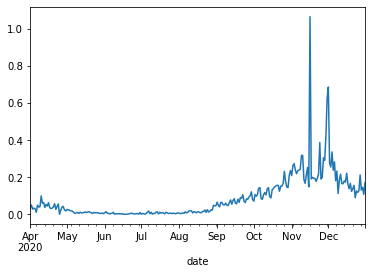

In [113]:
var_HUN_2020_fully['HUN_covid_positivity_rate'].plot()

In [114]:
# ROU

var_ROU_2020 = pd.concat([c_data_all_filtered_2020_ROU, f_data_2020_ROU_mean], axis = 1)

var_ROU_2020_fully = var_ROU_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_ROU_2020_04_to_09 = var_ROU_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_ROU_2020_10_to_12 = var_ROU_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [115]:
# Információ az adatkeretben található változókról

var_ROU_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       167 non-null    float64
 1   ROU_covid_death_rate                            183 non-null    float64
 2   ROU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ROU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [116]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_ROU_2020_04_to_09 = var_ROU_2020_04_to_09.interpolate(method='linear', limit_direction='both', axis=0, limit_area='inside')

In [117]:
# Információ az adatkeretben található változókról

var_ROU_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       183 non-null    float64
 1   ROU_covid_death_rate                            183 non-null    float64
 2   ROU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ROU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [118]:
# Információ az adatkeretben található változókról

var_ROU_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       62 non-null     float64
 1   ROU_covid_death_rate                            92 non-null     float64
 2   ROU_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   ROU_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [119]:
# mivel a pozitivítási arány változó  hiányzó értéket tartalmaz, ezért a lenti sorban lineáris interpoláció kerül alkalmazásra

var_ROU_2020_10_to_12 = var_ROU_2020_10_to_12.interpolate(method='linear', limit_direction='both', axis=0,limit_are='inside')

In [120]:
# Információ az adatkeretben található változókról

var_ROU_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       92 non-null     float64
 1   ROU_covid_death_rate                            92 non-null     float64
 2   ROU_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   ROU_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [121]:
# SVK


var_SVK_2020 = pd.concat([c_data_all_filtered_2020_SVK, f_data_2020_SVK_mean], axis = 1)

var_SVK_2020_fully = var_SVK_2020['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_SVK_2020_04_to_09 = var_SVK_2020['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_SVK_2020_10_to_12 = var_SVK_2020['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [122]:
# Információ az adatkeretben található változókról

var_SVK_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       183 non-null    float64
 1   SVK_covid_death_rate                            183 non-null    float64
 2   SVK_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   SVK_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [123]:
# Információ az adatkeretben található változókról

var_SVK_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       92 non-null     float64
 1   SVK_covid_death_rate                            92 non-null     float64
 2   SVK_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   SVK_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


In [124]:
# SVN


var_SVN_2020 = pd.concat([c_data_all_filtered_2020_SVN, f_data_2020_SVN_mean], axis = 1)

var_SVN_2020_fully = var_SVN_2020.loc['2020-04-01':'2020-12-31'] # 04.01-12.31 közötti időszak

var_SVN_2020_04_to_09 = var_SVN_2020.loc['2020-04-01':'2020-09-30'] # 04.01-09.30 közötti időszak

var_SVN_2020_10_to_12 = var_SVN_2020.loc['2020-10-01':'2020-12-31'] # 10.01-12.31 közötti időszak


In [125]:
# Információ az adatkeretben található változókról

var_SVN_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       183 non-null    float64
 1   SVN_covid_death_rate                            183 non-null    float64
 2   SVN_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   SVN_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


In [126]:
# Információ az adatkeretben található változókról

var_SVN_2020_10_to_12.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-10-01 to 2020-12-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       92 non-null     float64
 1   SVN_covid_death_rate                            92 non-null     float64
 2   SVN_all_day_bing_tiles_visited_relative_change  92 non-null     float64
 3   SVN_all_day_ratio_single_tile_users             92 non-null     float64
dtypes: float64(4)
memory usage: 3.6 KB


# Adatkeretek létrehozása

## 2021

In [127]:
# Albánia ALB


var_ALB_2021 = pd.concat([c_data_all_filtered_2021_ALB, f_data_2021_ALB_mean], axis = 1)

var_ALB_2021 = var_ALB_2021.loc['2021-01-01':'2021-08-31']


In [128]:
# Információ az adatkeretben található változókról

var_ALB_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ALB_covid_positivity_rate                       162 non-null    float64
 1   ALB_covid_death_rate                            243 non-null    float64
 2   ALB_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 3   ALB_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [129]:
# Bulgária

var_BGR_2021 = pd.concat([c_data_all_filtered_2021_BGR, f_data_2021_BGR_mean], axis=1)

var_BGR_2021 = var_BGR_2021.loc['2021-01-01':'2021-08-31']


In [130]:
# Információ az adatkeretben található változókról

var_BGR_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       172 non-null    float64
 1   BGR_covid_death_rate                            243 non-null    float64
 2   LTU_people_fully_vaccinated                     212 non-null    float64
 3   LTU_people_vaccinated                           211 non-null    float64
 4   BGR_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   BGR_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [131]:
# Csehország CZE

var_CZE_2021 = pd.concat([c_data_all_filtered_2021_CZE, f_data_2021_CZE_mean], axis=1)

var_CZE_2021 = var_CZE_2021.loc['2021-01-01':'2021-08-31']


In [132]:
# Információ az adatkeretben található változókról

var_CZE_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CZE_covid_positivity_rate                       243 non-null    float64
 1   CZE_covid_death_rate                            243 non-null    float64
 2   CZE_people_fully_vaccinated                     234 non-null    float64
 3   CZE_people_vaccinated                           243 non-null    float64
 4   CZE_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   CZE_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [133]:
# Észtország EST

var_EST_2021 = pd.concat([c_data_all_filtered_2021_EST, f_data_2021_EST_mean], axis = 1)

var_EST_2021 = var_EST_2021.loc['2021-01-01':'2021-08-31']


In [134]:
# Információ az adatkeretben található változókról

var_EST_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       243 non-null    float64
 1   EST_covid_death_rate                            243 non-null    float64
 2   EST_people_fully_vaccinated                     239 non-null    float64
 3   EST_people_vaccinated                           243 non-null    float64
 4   EST_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   EST_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [135]:
# Görögország GRC

var_GRC_2021 = pd.concat([c_data_all_filtered_2021_GRC, f_data_2021_GRC_mean], axis = 1)

var_GRC_2021 = var_GRC_2021.loc['2021-01-01':'2021-08-31']



In [136]:
# Információ az adatkeretben található változókról

var_GRC_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GRC_covid_positivity_rate                       225 non-null    float64
 1   GRC_covid_death_rate                            243 non-null    float64
 2   GRC_people_fully_vaccinated                     209 non-null    float64
 3   GRC_people_vaccinated                           224 non-null    float64
 4   GRC_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   GRC_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [137]:
# Lengyelország POL

var_POL_2021 = pd.concat([c_data_all_filtered_2021_POL, f_data_2021_POL_mean], axis = 1)

var_POL_2021 = var_POL_2021.loc['2021-01-01':'2021-08-31']


In [138]:
# Információ az adatkeretben található változókról

var_POL_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       237 non-null    float64
 1   POL_covid_death_rate                            243 non-null    float64
 2   POL_people_fully_vaccinated                     190 non-null    float64
 3   POL_people_vaccinated                           205 non-null    float64
 4   POL_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   POL_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [139]:
# Lettország LVA

var_LVA_2021 = pd.concat([c_data_all_filtered_2021_LVA, f_data_2021_LVA_mean])

var_LVA_2021 = var_LVA_2021.loc['2021-01-01':'2021-08-31']




In [140]:
# Információ az adatkeretben található változókról

var_LVA_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 486 entries, 2021-01-01 to 2021-08-31
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LVA_covid_positivity_rate                       239 non-null    float64
 1   LVA_covid_death_rate                            243 non-null    float64
 2   LVA_people_fully_vaccinated                     243 non-null    float64
 3   LVA_people_vaccinated                           243 non-null    float64
 4   LVA_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   LVA_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 26.6 KB


In [141]:
# Litvánia LTU

var_LTU_2021 = pd.concat([c_data_all_filtered_2021_LTU, f_data_2021_LTU_mean], axis = 1)

var_LTU_2021 = var_LTU_2021.loc['2021-01-01':'2021-08-31']



In [142]:
# Információ az adatkeretben található változókról

var_LTU_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   LTU_covid_positivity_rate                       243 non-null    float64
 1   LTU_covid_death_rate                            243 non-null    float64
 2   LTU_people_fully_vaccinated                     227 non-null    float64
 3   LTU_people_vaccinated                           243 non-null    float64
 4   LTU_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5                                                   243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [143]:
# Magyarország HUN

var_HUN_2021 = pd.concat([c_data_all_filtered_2021_HUN, f_data_2021_HUN_mean], axis = 1)

var_HUN_2021 = var_HUN_2021.loc['2021-01-01':'2021-08-31']


In [144]:
# Információ az adatkeretben található változókról

var_HUN_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       218 non-null    float64
 1   HUN_covid_death_rate                            243 non-null    float64
 2   HUN_people_fully_vaccinated                     186 non-null    float64
 3   HUN_people_vaccinated                           186 non-null    float64
 4   HUN_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   HUN_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [145]:
# Románia ROU

var_ROU_2021 = pd.concat([c_data_all_filtered_2021_ROU, f_data_2021_ROU_mean], axis = 1)

var_ROU_2021 = var_ROU_2021.loc['2021-01-01':'2021-08-31']


In [146]:
# Információ az adatkeretben található változókról

var_ROU_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       148 non-null    float64
 1   ROU_covid_death_rate                            243 non-null    float64
 2   ROU_people_fully_vaccinated                     220 non-null    float64
 3   ROU_people_vaccinated                           236 non-null    float64
 4   ROU_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   ROU_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [147]:
# Szlovákia SVK

var_SVK_2021 = pd.concat([c_data_all_filtered_2021_SVK, f_data_2021_SVK_mean], axis = 1)

var_SVK_2021 = var_SVK_2021.loc['2021-01-01':'2021-08-31']


In [148]:
# Információ az adatkeretben található változókról

var_SVK_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       243 non-null    float64
 1   SVK_covid_death_rate                            243 non-null    float64
 2   SVK_people_fully_vaccinated                     226 non-null    float64
 3   SVK_people_vaccinated                           240 non-null    float64
 4   SVK_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   SVK_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [149]:
# Szlovénia SVN

var_SVN_2021 = pd.concat([c_data_all_filtered_2021_SVN, f_data_2021_SVN_mean], axis = 1)

var_SVN_2021 = var_SVN_2021.loc['2021-01-01':'2021-08-31']


In [150]:
# Információ az adatkeretben található változókról

var_SVN_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2021-01-01 to 2021-08-31
Freq: D
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       243 non-null    float64
 1   SVN_covid_death_rate                            243 non-null    float64
 2   SVN_people_fully_vaccinated                     243 non-null    float64
 3   SVN_people_vaccinated                           243 non-null    float64
 4   SVN_all_day_bing_tiles_visited_relative_change  243 non-null    float64
 5   SVN_all_day_ratio_single_tile_users             243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


# VAR modell építése, Stacionarítás vizsgálata, Differenciálás, Granger-okság, VAR modell

In [151]:
#######################################################################################################
#######################################################################################################
#######################################################################################################
#######################################################################################################

# VAR modell építése a 2020.04.01-2020.09.30 közötti időszakra

In [152]:
# csomagok betöltése a VAR modell építéséhez

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt  # Diagram új ablak történő megjelenítése
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import statsmodels.api as sm

# Albánia

In [153]:
# Albánia ALB


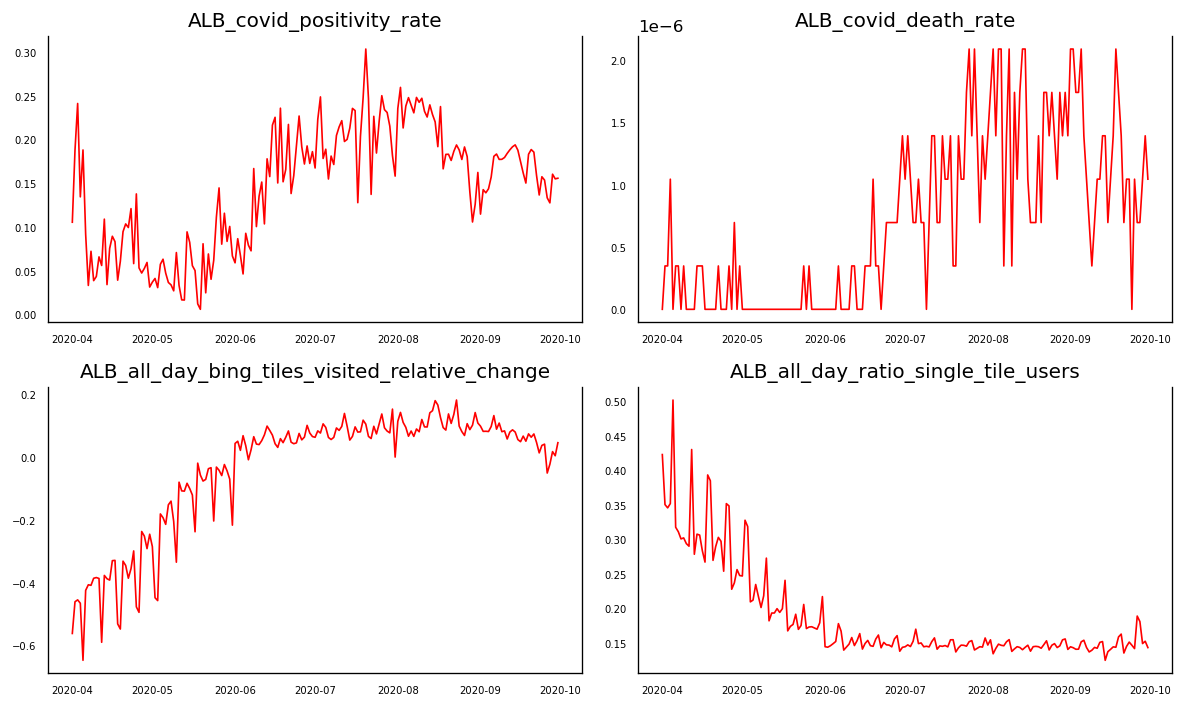

In [154]:
# Adatok vizuális megjelenítése

# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = var_ALB_2020_04_to_09[var_ALB_2020_04_to_09.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(var_ALB_2020_04_to_09.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
#plt.show()

## Stacionarítás teszteléséhez szükséges függvény

In [155]:
# Stacionarítás ellenőrzése --> Függvény létrehozása, amelynek köszönhetően a dataframeben található változók mindegyikére futtatható lesz a stacionaritás tesztelése

# A stacionarítás teszteléséhez felhasznált függvény Selva által került megírásra.

# Forrás: Selva Prabhakaran (2019): Vector Autoregression (VAR) – Comprehensive Guide with Examples in Python, online, letöltés dátuma: 2021.09.27. https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/


def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag = 'AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

## Stacionarítás tesztelése Albánia

In [156]:
# A stacionarítás ellenőrzésének eredménye

# ADF Teszt elvégzése a dataframe minden oszlopára

for name, column in var_ALB_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4985
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.5342. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1088
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.7115. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    ---

## Első differenciálás Albánia

In [157]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ALB_2020_04_to_09_differenced_1 = var_ALB_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelés Albánia

In [158]:
# A stacionarítás ellenőrzésének eredménye a differenciálás után

# ADF Test on each column
for name, column in var_ALB_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.4006
 No. Lags Chosen       = 3
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.9038
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

## Második differenciálás Albánia

In [159]:
# Mivel az egyik változó nem stacionárius, ezért ismét differenciálásra kerülnek a változók

# 2 differenciázott

var_ALB_2020_04_to_09_differenced_2 = var_ALB_2020_04_to_09_differenced_1.diff().dropna()

## Stacionarítás tesztelése Albánia

In [160]:
# Stacioniarítsá ellenőrzése a differenciálás után


# ADF Test on each column of 2nd Differences Dataframe
for name, column in var_ALB_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ALB_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.2605
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7244
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ALB_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

## Dummy változó létrehozása Albánia

In [161]:
# Dummy válotozók létrehozása referencia kódolással

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ALB_2020_04_to_09_differenced_2[x] = (var_ALB_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [162]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_ALB_2020_04_to_09_differenced_2_endogen = var_ALB_2020_04_to_09_differenced_2.iloc[:,:4]
var_ALB_2020_04_to_09_differenced_2_exogen = var_ALB_2020_04_to_09_differenced_2.iloc[:, 4:]

In [163]:
# Az endogén változók megtekintése

var_ALB_2020_04_to_09_differenced_2_endogen

,ALB_covid_positivity_rate,ALB_covid_death_rate,ALB_all_day_bing_tiles_visited_relative_change,ALB_all_day_ratio_single_tile_users
date,,,,
2020-04-03,-0.028665,-3.480762e-07,-0.094953,0.067767
2020-04-04,-0.160384,6.961524e-07,-0.016887,0.010936
2020-04-05,0.160472,-1.740381e-06,-0.170803,0.143806
2020-04-06,-0.150151,1.392305e-06,0.404366,-0.334371
2020-04-07,0.038029,-3.480762e-07,-0.204876,0.177854
...,...,...,...,...
2020-09-26,-0.016485,-1.392305e-06,-0.096028,0.052008
2020-09-27,0.014531,3.480762e-07,0.120083,-0.055080
2020-09-28,0.038555,3.480762e-07,0.012077,-0.023928


In [164]:
# Az exogén változók megtekintése

var_ALB_2020_04_to_09_differenced_2_exogen

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
date,,,,,,
2020-04-03,0,0,0,0,1,0
2020-04-04,0,0,0,0,0,1
2020-04-05,0,0,0,0,0,0
2020-04-06,1,0,0,0,0,0
2020-04-07,0,1,0,0,0,0
...,...,...,...,...,...,...
2020-09-26,0,0,0,0,0,1
2020-09-27,0,0,0,0,0,0
2020-09-28,1,0,0,0,0,0


In [165]:
# Késleltetést számának meghatározása az információs kritériumok segítségével


model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen = VAR(endog=var_ALB_2020_04_to_09_differenced_2_endogen, exog=var_ALB_2020_04_to_09_differenced_2_exogen)
#for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
#    result = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.fit(i)
#    print('Lag Order =', i)
#    print('AIC : ', result.aic)
#    print('BIC : ', result.bic)
#    print('FPE : ', result.fpe)
#    print('HQIC: ', result.hqic, '\n')

In [166]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-46.56,-46.04,6.001e-21,-46.35
1,-47.94,-47.12,1.510e-21,-47.61
2,-49.15,-48.03,4.506e-22,-48.70
3,-49.71,-48.30,2.577e-22,-49.14
4,-49.82,-48.11,2.319e-22,-49.13
5,-50.10,-48.08,1.767e-22,-49.28
6,-51.30,-48.99*,5.347e-23,-50.36*
7,-51.41,-48.80,4.818e-23,-50.35
8,-51.51,-48.60,4.397e-23,-50.33
9,-51.60,-48.39,4.087e-23,-50.30


## Granger-okság tesztelése Albánia

In [167]:
# Granger-okság tesztelése két változóra

'''
# A lenti cellában használt függvény segítségével mindössze azt nézzük meg, hogy Y változónak Granger oka-e az X változó
# Egyszerre csak két változót vizsgálunk
# F-tesztet használunk

# A lenti függvény eredményeként visszakapjuk a legkisebb p-értéket a megadott késleltetésszámíg adott eredményváltozó
és annak magyarázó változójára
'''


'\n# A lenti cellában használt függvény segítségével mindössze azt nézzük meg, hogy Y változónak Granger oka-e az X változó\n# Egyszerre csak két változót vizsgálunk\n# F-tesztet használunk\n\n# A lenti függvény eredményeként visszakapjuk a legkisebb p-értéket a megadott késleltetésszámíg adott eredményváltozó\nés annak magyarázó változójára\n'

In [168]:
# Granger okság tesztelés

# Forrás: Selva Prabhakaran (2019): Vector Autoregression (VAR) – Comprehensive Guide with Examples in Python, online, letöltés dátuma: 2021.09.27. https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/


from statsmodels.tsa.stattools import grangercausalitytests
maxlag=14
test = 'ssr_ftest'
def grangers_causation_matrix(data, variables, test='ssr_ftest', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_ALB_2020_04_to_09_differenced_2_endogen, variables = var_ALB_2020_04_to_09_differenced_2_endogen.columns)    

,ALB_covid_positivity_rate_x,ALB_covid_death_rate_x,ALB_all_day_bing_tiles_visited_relative_change_x,ALB_all_day_ratio_single_tile_users_x
ALB_covid_positivity_rate_y,1.0000,0.0154,0.5810,0.2554
ALB_covid_death_rate_y,0.0191,1.0000,0.4575,0.2974
ALB_all_day_bing_tiles_visited_relative_change_y,0.4376,0.0795,1.0000,0.0878
ALB_all_day_ratio_single_tile_users_y,0.0668,0.1104,0.0549,1.0000


In [169]:
# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [170]:
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_pr = VAR(endog=var_ALB_2020_04_to_09_differenced_2_endogen).fit(14).test_causality('ALB_covid_positivity_rate', ['ALB_all_day_bing_tiles_visited_relative_change','ALB_all_day_ratio_single_tile_users'], kind='f')

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_pr.summary()

Test statistic,Critical value,p-value,df
1.498,1.502,0.051,"(28, 440)"


In [362]:
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_dr = VAR(endog=var_ALB_2020_04_to_09_differenced_2_endogen,exog=var_ALB_2020_04_to_09_differenced_2_exogen).fit(14).test_causality('ALB_covid_death_rate', ['ALB_all_day_bing_tiles_visited_relative_change', 'ALB_all_day_ratio_single_tile_users'], kind='f')

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_Granger_c_dr.summary()

Test statistic,Critical value,p-value,df
0.7364,1.503,0.836,"(28, 416)"


## VAR modell építése Albánia

In [172]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.fit(14)
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:17:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -46.9919
Nobs:                     167.000    HQIC:                  -49.7873
Log likelihood:           3620.84    FPE:                4.13435e-23
AIC:                     -51.6969    Det(Omega_mle):     1.14911e-23
--------------------------------------------------------------------
Results for equation ALB_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.000729         0.012389            0.059           0.953
Monday    

## Fehérzaj folyamat Albánia

In [173]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e az adatkeretben található változók

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_whiteness_all_variable = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_whiteness_all_variable.summary()


Test statistic,Critical value,p-value,df
179.9,26.30,0.000,16


In [359]:
VAR(endog=var_ALB_2020_04_to_09_differenced_2_endogen, exog=var_ALB_2020_04_to_09_differenced_2_exogen).fit(14).test_whiteness(nlags=15, signif=0.05, adjusted=False).summary()

Test statistic,Critical value,p-value,df
179.9,26.30,0.000,16


In [174]:
# Rezidumok tesztelése, hogy fehérzajt követ-e az adott változó



model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen.resid


In [175]:
# Annak tesztelése, hogy a pozivitási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_pr = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_covid_positivity_rate']


In [176]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_pr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.344980,0.556969
2,1.201985,0.548267
3,1.722464,0.631951
4,1.829371,0.767105
5,1.864730,0.867528
6,6.401592,0.379738
7,7.666430,0.362924
8,12.372538,0.135340
9,13.987133,0.122784
10,15.469612,0.115855


In [177]:
# Annak tesztelése, hogy a halálozási arány változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_dr = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_covid_death_rate']

In [178]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_dr, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.001471,0.969403
2,0.008775,0.995622
3,0.195136,0.978371
4,0.439203,0.979143
5,1.171431,0.947589
6,2.386877,0.880907
7,4.200925,0.756366
8,6.541686,0.586788
9,6.718962,0.666353
10,8.220175,0.607340


In [179]:
# Annak tesztelése, hogy a relatív mobilitás változása változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_rmch = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_all_day_bing_tiles_visited_relative_change']

In [180]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_rmch, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.014820,0.903106
2,0.034124,0.983083
3,0.216435,0.974893
4,0.370245,0.984840
5,2.614132,0.759217
6,4.803173,0.569294
7,4.999050,0.660079
8,5.148405,0.741603
9,5.175732,0.818728
10,5.315734,0.869114


In [181]:
# Annak tesztelése, hogy a otthonmaradási ráta változó reziduma fehérzajfolyamatot követ-e

model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_st = model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals['ALB_all_day_ratio_single_tile_users']

In [182]:
sm.stats.acorr_ljungbox(model_var_ALB_2020_04_to_09_differenced_2_endogen_exogen_residuals_st, lags = 14, return_df = True)

,lb_stat,lb_pvalue
1,0.089402,0.764939
2,0.118414,0.942511
3,0.122647,0.988988
4,6.557163,0.161224
5,7.734259,0.171502
6,15.547171,0.016402
7,16.059006,0.024583
8,16.063179,0.041485
9,16.321127,0.060471
10,18.972058,0.040619


## Bulgária

## Stacionarítás tesztelése Bulgária

In [183]:
## Stacionarítás tesztelése Bulgária

In [184]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1107
 No. Lags Chosen       = 1
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1255
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.7048. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    ----------------------------

In [185]:
# Mivel a halálozási arány nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_BGR_2020_04_to_09_differenced_1 = var_BGR_2020_04_to_09.diff().dropna()

In [186]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6419
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3653
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

## Dummy változók létrehozása az adatkeretbe Bulgária

In [187]:
# Dummy változók létrehozása az adatkeretbe Bulgária

In [188]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_BGR_2020_04_to_09_differenced_1[x] = (var_BGR_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [189]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_BGR_2020_04_to_09_differenced_1_endogen = var_BGR_2020_04_to_09_differenced_1.iloc[:,:4]
var_BGR_2020_04_to_09_differenced_1_exogen = var_BGR_2020_04_to_09_differenced_1.iloc[:, 4:]

In [190]:
var_BGR_2020_04_to_09_differenced_1_exogen

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
date,,,,,,
2020-04-02,0,0,0,1,0,0
2020-04-03,0,0,0,0,1,0
2020-04-04,0,0,0,0,0,1
2020-04-05,0,0,0,0,0,0
2020-04-06,1,0,0,0,0,0
...,...,...,...,...,...,...
2020-09-26,0,0,0,0,0,1
2020-09-27,0,0,0,0,0,0
2020-09-28,1,0,0,0,0,0


## Késleltetés megválasztása Bulgária

In [191]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_BGR_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen, exog=var_BGR_2020_04_to_09_differenced_1_exogen)


In [192]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.31,-50.79,5.223e-23,-51.10
1,-52.23,-51.41,2.077e-23,-51.90
2,-52.57,-51.45*,1.486e-23,-52.11*
3,-52.53,-51.12,1.539e-23,-51.96
4,-52.60,-50.89,1.449e-23,-51.90
5,-52.77,-50.76,1.224e-23,-51.95
6,-52.81*,-50.51,1.179e-23*,-51.88
7,-52.70,-50.09,1.335e-23,-51.64
8,-52.66,-49.76,1.391e-23,-51.49
9,-52.68,-49.48,1.389e-23,-51.38


## Granger-okság tesztelése Bulgária

In [195]:
# A lenti pédában az nézzük meg, hogy a Y változónak Granger oka-e a X és Z változó
# Vagyis három változó lesz megtalálható a modellben
# Elsőnek megnézzük, hogy a pozitivitási aránynak  Granger oka-e a relatív mobilitási arány és az otthonmaradási ráta

In [364]:
model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_pr = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen).fit(6).test_causality('BGR_covid_positivity_rate', causing = ['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f')

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_pr.summary()

Test statistic,Critical value,p-value,df
2.789,1.768,0.001,"(12, 604)"


In [197]:
model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_dr = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen).fit(6).test_causality('BGR_covid_death_rate', causing = ['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f')

model_var_BGR_2020_04_to_09_differenced_1_endogen_exogen_Granger_c_dr.summary()

Test statistic,Critical value,p-value,df
2.158,1.768,0.012,"(12, 604)"


In [198]:
VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen, exog=var_BGR_2020_04_to_09_differenced_1_exogen).fit(6).test_causality('BGR_covid_death_rate', causing = ['BGR_all_day_bing_tiles_visited_relative_change','BGR_all_day_ratio_single_tile_users'], kind='f').summary()

Test statistic,Critical value,p-value,df
1.082,1.769,0.372,"(12, 580)"


## VAR modell építése Bulgária

In [199]:
# Késleltetés illesztése a modellre

model_var_BGR_2020_04_to_09_differenced_1_endog_exog = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(6)
model_var_BGR_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:17:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.5216
Nobs:                     176.000    HQIC:                  -51.8494
Log likelihood:           3767.54    FPE:                1.24475e-23
AIC:                     -52.7554    Det(Omega_mle):     6.50508e-24
--------------------------------------------------------------------
Results for equation BGR_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000681         0.028446           -0.024           0.981
Monday       

In [200]:
VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen).fit(6).summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:17:54
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.2791
Nobs:                     176.000    HQIC:                  -51.3498
Log likelihood:           3684.15    FPE:                2.42717e-23
AIC:                     -52.0805    Det(Omega_mle):     1.42681e-23
--------------------------------------------------------------------
Results for equation BGR_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.000610         0.001968            0.310           0.757
L1.BGR_covid_

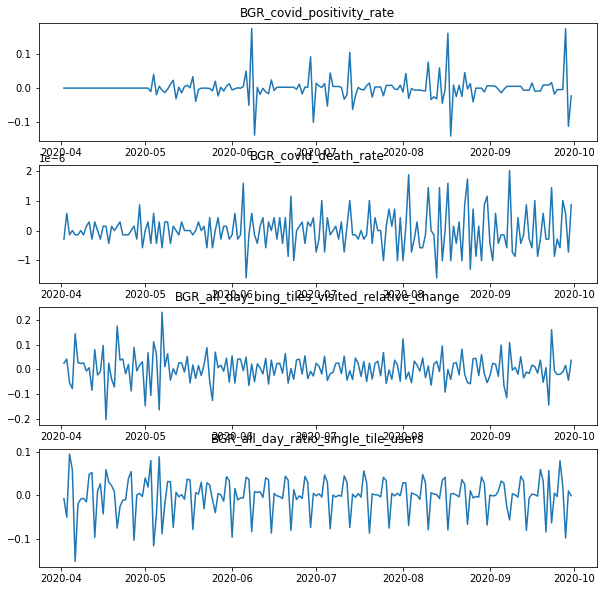

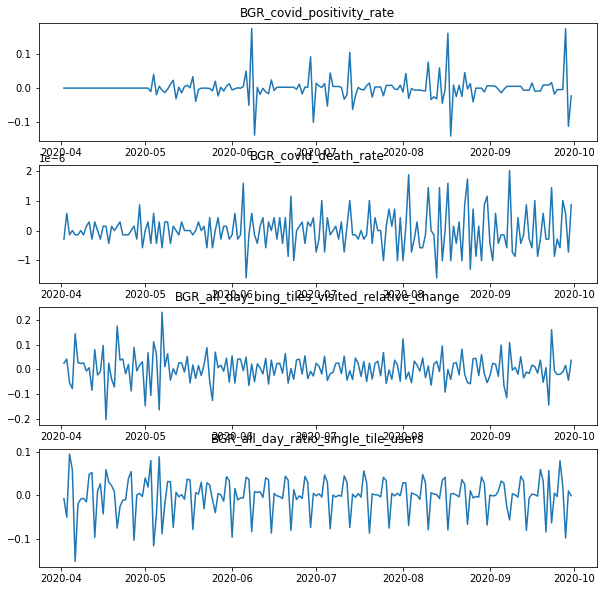

In [201]:
model_var_BGR_2020_04_to_09_differenced_1_endog_exog.plot()

## Fehérzaj folyamat Bulgária

In [202]:
# Fehérzaj folyamat tesztelése

In [203]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e az adatkeretben található változók

model_var_BGR_2020_04_to_09_differenced_2_endogen_exogen_whiteness_all_variable = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen).fit(6).test_whiteness(nlags = 7,signif=0.05, adjusted=False)

model_var_BGR_2020_04_to_09_differenced_2_endogen_exogen_whiteness_all_variable.summary()

Test statistic,Critical value,p-value,df
104.3,26.30,0.000,16


In [204]:
# Rezidumok tesztelése, hogy fehérzajt követ-e az adott változó

model_var_BGR_2020_04_to_09_differenced_2_endogen_exogen_residuals = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.resid


In [205]:
VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen).fit(6).resid

,BGR_covid_positivity_rate,BGR_covid_death_rate,BGR_all_day_bing_tiles_visited_relative_change,BGR_all_day_ratio_single_tile_users
date,,,,
2020-04-08,0.009002,-2.212398e-07,0.023858,-0.038179
2020-04-09,0.016599,6.985877e-09,-0.008475,-0.010403
2020-04-10,-0.000746,-4.970464e-07,0.043088,-0.032186
2020-04-11,0.005088,2.620529e-07,-0.021737,-0.015795
2020-04-12,0.031962,2.919193e-07,-0.022490,-0.013727
...,...,...,...,...
2020-09-26,-0.000606,-2.792588e-07,-0.104048,0.040256
2020-09-27,0.000101,6.656743e-07,0.021810,-0.008863
2020-09-28,0.117167,7.358064e-07,-0.003493,-0.027275


## Görögország

In [206]:
###########################################################################################
###########################################################################################

# Görögország GRC

In [207]:
# A pozitivási arány változó tartalmaz NaN értéket

#Megfelelő lesz, ha eltávolítjuk a NaN értéket tartalmazó sorokat?

#var_GRC_2020 = var_GRC_2020.dropna()



In [208]:
var_GRC_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   GRC_covid_positivity_rate                   183 non-null    float64
 1   GRC_covid_death_rate                        183 non-null    float64
 2   all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


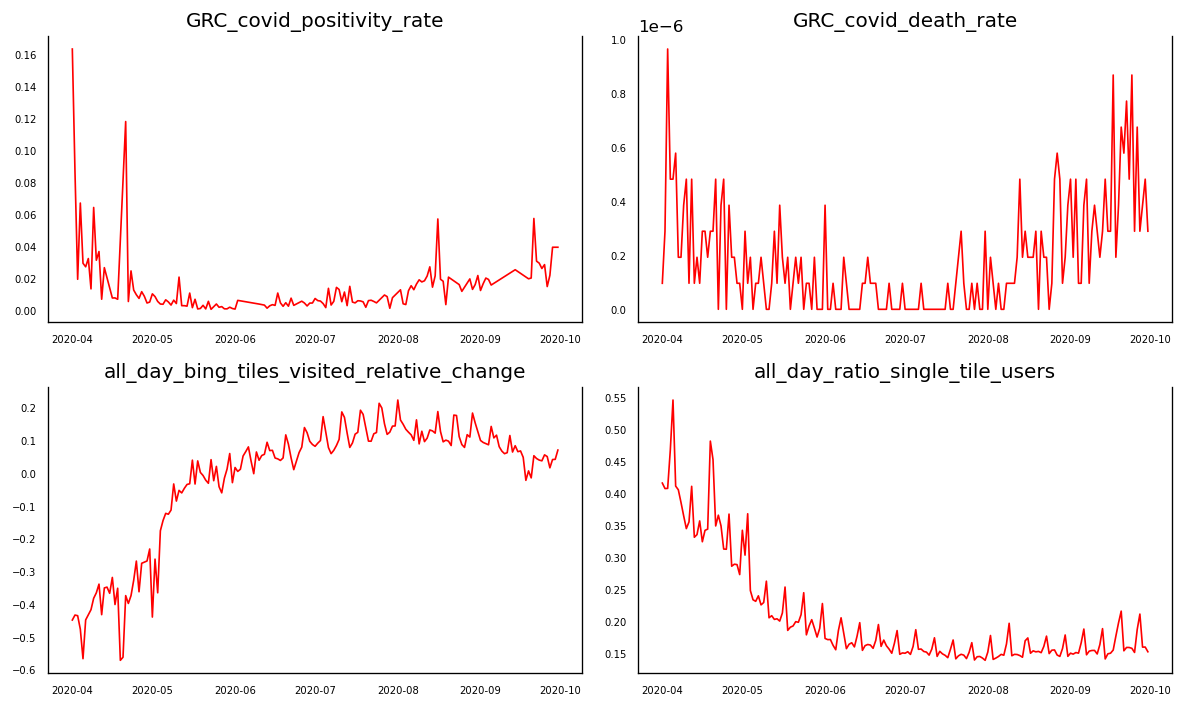

In [209]:
# Adatok vizuális megjelenítése

# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = var_GRC_2020_04_to_09[var_GRC_2020_04_to_09.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(var_GRC_2020_04_to_09.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
#plt.show()

### Stacionarítás Görögország
A Görögországra létrehozott adatkeretben található változók stacionarításának tesztelése

In [210]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6066
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0916. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7379
 No. Lags Chosen       = 6
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.4117. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "all_day_bing_tiles_visited_relative_change" 
    -------

## Első differenciálás Görögország

In [211]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_GRC_2020_04_to_09_differenced_1 = var_GRC_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelése Görögország

In [212]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.1579
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1086
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null Hyp

## Második differenciálás

In [213]:
# Mivel az egyik változó nem stacionárius, ezért ismét differenciálásra kerülnek a változók

# 2 differenciázott

var_GRC_2020_04_to_09_differenced_2 = var_GRC_2020_04_to_09_differenced_1.diff().dropna()

## Stacionarítás tesztelése Görögország

In [214]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_GRC_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GRC_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9522
 No. Lags Chosen       = 10
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GRC_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.8777
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null Hy

## Dummy változók létrehozása az adatkeretbe

In [215]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_GRC_2020_04_to_09_differenced_2[x] = (var_GRC_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [216]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_GRC_2020_04_to_09_differenced_2_endogen = var_GRC_2020_04_to_09_differenced_2.iloc[:,:4]
var_GRC_2020_04_to_09_differenced_2_exogen = var_GRC_2020_04_to_09_differenced_2.iloc[:, 4:]

## Késleltetés megválasztása

In [217]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_GRC_2020_04_to_09_differenced_2_endog_exog = VAR(endog=var_GRC_2020_04_to_09_differenced_2_endogen, exog=var_GRC_2020_04_to_09_differenced_2_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -53.296083725081495
BIC :  -52.51558316153055
FPE :  7.146112270113817e-24
HQIC:  -52.979624355610255 

Lag Order = 2
AIC :  -54.6118876970399
BIC :  -53.54349022022176
FPE :  1.918858347134717e-24
HQIC:  -54.178660967219145 

Lag Order = 3
AIC :  -55.06332604091662
BIC :  -53.70481171607281
FPE :  1.2238256274915247e-24
HQIC:  -54.512412021905355 

Lag Order = 4
AIC :  -55.719539477441195
BIC :  -54.06865939045367
FPE :  6.3661754015600895e-25
HQIC:  -55.05000663425565 

Lag Order = 5
AIC :  -56.180510487418
BIC :  -54.234986217735496
FPE :  4.030469226460858e-25
HQIC:  -55.39141548262688 

Lag Order = 6
AIC :  -56.488995113711496
BIC :  -54.24651819504569
FPE :  2.97647832294321e-25
HQIC:  -55.57938260709356 

Lag Order = 7
AIC :  -56.603000838034866
BIC :  -54.06123220648295
FPE :  2.674793978112422e-25
HQIC:  -55.57190328210591 

Lag Order = 8
AIC :  -56.65565265249276
BIC :  -53.812222081731754
FPE :  2.5612421691932784e-25
HQIC:  -55.50209008380723 

Lag Orde

In [218]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-52.31,-51.79,1.912e-23,-52.10
1,-54.15,-53.33,3.041e-24,-53.82
2,-55.13,-54.01,1.140e-24,-54.68
3,-55.63,-54.21,6.979e-25,-55.05
4,-56.21,-54.50,3.889e-25,-55.52
5,-56.58,-54.56*,2.719e-25,-55.76
6,-56.84,-54.53,2.093e-25,-55.90
7,-56.91,-54.30,1.975e-25,-55.85
8,-56.90,-53.99,2.018e-25,-55.72
9,-57.08,-53.87,1.694e-25,-55.78


## Granger-okság tesztelése

In [219]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=14
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_GRC_2020_04_to_09_differenced_2_endogen, variables = var_GRC_2020_04_to_09_differenced_2_endogen.columns) 

,GRC_covid_positivity_rate_x,GRC_covid_death_rate_x,all_day_bing_tiles_visited_relative_change_x,all_day_ratio_single_tile_users_x
GRC_covid_positivity_rate_y,1.0,0.0483,0.0000,0.0000
GRC_covid_death_rate_y,0.0,1.0000,0.0001,0.0001
all_day_bing_tiles_visited_relative_change_y,0.0,0.0032,1.0000,0.0000
all_day_ratio_single_tile_users_y,0.0,0.0048,0.0000,1.0000


## VAR modell Görögország

In [220]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_GRC_2020_04_to_09_differenced_2_endog_exog = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.fit(14)
model_var_GRC_2020_04_to_09_differenced_2_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:17:56
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -53.1214
Nobs:                     167.000    HQIC:                  -55.9167
Log likelihood:           4132.65    FPE:                9.00356e-26
AIC:                     -57.8264    Det(Omega_mle):     2.50247e-26
--------------------------------------------------------------------
Results for equation GRC_covid_positivity_rate
                                                    coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------
const                                                 -0.022178         0.011495           -1.929           0.054
Monday                

## Fehérzaj folyamat tesztelése

In [221]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_GRC_2020_04_to_09_differenced_2_endog_exog = model_var_GRC_2020_04_to_09_differenced_2_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_GRC_2020_04_to_09_differenced_2_endog_exog.summary()

Test statistic,Critical value,p-value,df
156.5,26.30,0.000,16


In [222]:
# Összefoglaló Görögország GRC

'''
Ebben az adatszerkezetben már találtunk NaN értéket a pozitivitási arány változóban, ezért eltávolításra kerültek ezek a sorok. 

Ebben az adatszerkezetben már találtunk Granger okságot.

Az adatokat egyszer kellett differenciálni, hogy stacionáriusak legyenek a változók.

AIC alapján a 14 késleltetés került kiválasztásra.

A 10 késleltetéstől találunk szignifikáns koefficienst a COVID-19 pozitivitási arányra a helyben maradás változó esetén. 

Vizsgált időszak: 2020-04-01 - 2020-09-30



'''

'\nEbben az adatszerkezetben már találtunk NaN értéket a pozitivitási arány változóban, ezért eltávolításra kerültek ezek a sorok. \n\nEbben az adatszerkezetben már találtunk Granger okságot.\n\nAz adatokat egyszer kellett differenciálni, hogy stacionáriusak legyenek a változók.\n\nAIC alapján a 14 késleltetés került kiválasztásra.\n\nA 10 késleltetéstől találunk szignifikáns koefficienst a COVID-19 pozitivitási arányra a helyben maradás változó esetén. \n\nVizsgált időszak: 2020-04-01 - 2020-09-30\n\n\n\n'

# Magyaroszág

In [223]:
# Magyarország HUN

In [224]:
var_HUN_2020_04_to_09

,HUN_covid_positivity_rate,HUN_covid_death_rate,HUN_all_day_bing_tiles_visited_relative_change,HUN_all_day_ratio_single_tile_users
date,,,,
2020-04-01,0.031073,4.151892e-07,-0.309668,0.312236
2020-04-02,0.050293,1.037973e-07,-0.287871,0.296819
2020-04-03,0.027778,5.189865e-07,-0.262144,0.278581
2020-04-04,0.033233,6.227838e-07,-0.274618,0.340848
2020-04-05,0.030120,2.075946e-07,-0.289621,0.404923
...,...,...,...,...
2020-09-26,0.080631,1.245568e-06,-0.073595,0.258481
2020-09-27,0.093021,6.227838e-07,-0.015612,0.303130
2020-09-28,0.099363,1.349365e-06,-0.031107,0.176692


In [225]:
# Az adatkeret leírása. Például az adatkeretben található változók tartalmaznak-e NaN értéket

# Nem kerülne bele a szakdolgozatba

var_HUN_2020_04_to_09.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   HUN_covid_positivity_rate                       183 non-null    float64
 1   HUN_covid_death_rate                            183 non-null    float64
 2   HUN_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   HUN_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


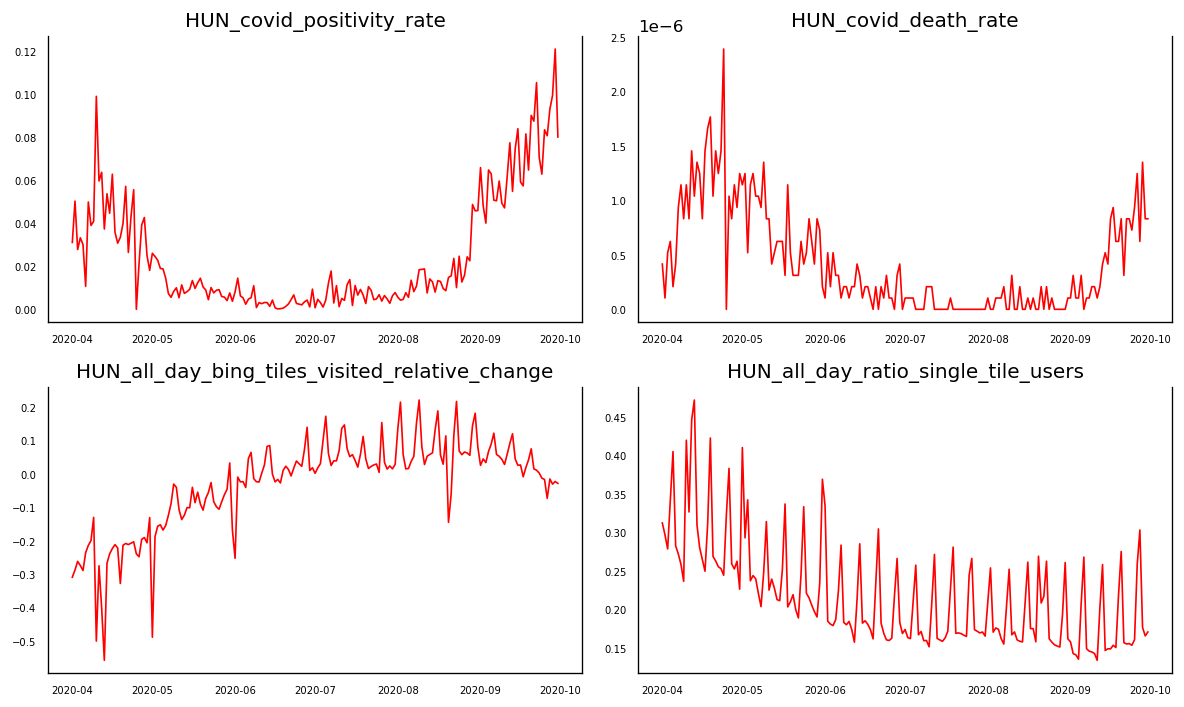

In [226]:
# Adatok vizuális megjelenítése

# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = var_HUN_2020_04_to_09[var_HUN_2020_04_to_09.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(var_HUN_2020_04_to_09.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
#plt.show()

## Első Stacionarítás Magyarország

In [227]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1169
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.9477. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1583
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.6913. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    ---

## Első Differenciálás Magyarország

In [228]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_HUN_2020_04_to_09_differenced_1 = var_HUN_2020_04_to_09.diff().dropna()

## Második Stacionarítás Magyarország

In [229]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1573
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.2221. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.3526
 No. Lags Chosen       = 3
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    ---------------------------

## Második Differenciálás Magyarország

In [230]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_HUN_2020_04_to_09_differenced_2 = var_HUN_2020_04_to_09_differenced_1.diff().dropna()

## Harmadik Stacionarítás Magyarország

In [231]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_HUN_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "HUN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7087
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5183
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HUN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

## Dummy változók létrehozása az adatkeretbe Magyarország

In [232]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_HUN_2020_04_to_09_differenced_2[x] = (var_HUN_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [233]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_HUN_2020_04_to_09_differenced_2_endogen = var_HUN_2020_04_to_09_differenced_2.iloc[:,:4]
var_HUN_2020_04_to_09_differenced_2_exogen = var_HUN_2020_04_to_09_differenced_2.iloc[:, 4:]

## Késleltetés megválasztása

In [234]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_HUN_2020_04_to_09_differenced_2_endog_exog = VAR(endog=var_HUN_2020_04_to_09_differenced_2_endogen, exog=var_HUN_2020_04_to_09_differenced_2_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -50.073308798980214
BIC :  -49.29280823542927
FPE :  1.7935075192715587e-22
HQIC:  -49.756849429508975 

Lag Order = 2
AIC :  -51.31389487042001
BIC :  -50.24549739360187
FPE :  5.192099440967262e-23
HQIC:  -50.880668140599255 

Lag Order = 3
AIC :  -51.757650033381005
BIC :  -50.399135708537194
FPE :  3.3370014266151e-23
HQIC:  -51.20673601436974 

Lag Order = 4
AIC :  -52.07382155673229
BIC :  -50.422941469744764
FPE :  2.4388987758829316e-23
HQIC:  -51.40428871354675 

Lag Order = 5
AIC :  -52.50797244405248
BIC :  -50.562448174369976
FPE :  1.5860563622243166e-23
HQIC:  -51.71887743926136 

Lag Order = 6
AIC :  -53.23696353778076
BIC :  -50.99448661911495
FPE :  7.692049890945079e-24
HQIC:  -52.32735103116282 

Lag Order = 7
AIC :  -53.53652658184494
BIC :  -50.99475795029302
FPE :  5.7417355373273725e-24
HQIC:  -52.50542902591598 

Lag Order = 8
AIC :  -53.94928127930089
BIC :  -51.10585070853988
FPE :  3.835418837578263e-24
HQIC:  -52.79571871061536 

Lag Ord

In [235]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-49.38,-48.86,3.587e-22,-49.17
1,-51.09,-50.27,6.474e-23,-50.76
2,-52.11,-50.99,2.351e-23,-51.65
3,-52.65,-51.24,1.362e-23,-52.08
4,-53.02,-51.31,9.433e-24,-52.33
5,-53.46,-51.45,6.101e-24,-52.65
6,-54.25,-51.93*,2.802e-24,-53.31
7,-54.50,-51.88,2.202e-24,-53.44*
8,-54.60,-51.69,1.998e-24,-53.42
9,-54.59,-51.38,2.050e-24,-53.29


## Granger-okság Magyarország

In [236]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=14
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_HUN_2020_04_to_09_differenced_2_endogen, variables = var_HUN_2020_04_to_09_differenced_2_endogen.columns) 

,HUN_covid_positivity_rate_x,HUN_covid_death_rate_x,HUN_all_day_bing_tiles_visited_relative_change_x,HUN_all_day_ratio_single_tile_users_x
HUN_covid_positivity_rate_y,1.0,0.0144,0.0053,0.0
HUN_covid_death_rate_y,0.0,1.0000,0.0028,0.0
HUN_all_day_bing_tiles_visited_relative_change_y,0.0,0.0000,1.0000,0.0
HUN_all_day_ratio_single_tile_users_y,0.0,0.0000,0.0000,1.0


## VAR modell építése Magyarország

In [237]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_HUN_2020_04_to_09_differenced_2_endog_exog = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.fit(14)
model_var_HUN_2020_04_to_09_differenced_2_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:17:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.1914
Nobs:                     167.000    HQIC:                  -52.9867
Log likelihood:           3887.99    FPE:                1.68621e-24
AIC:                     -54.8963    Det(Omega_mle):     4.68669e-25
--------------------------------------------------------------------
Results for equation HUN_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.018160         0.011097           -1.636           0.102
Monday    

## Fehérzaj folyamat tesztelése

In [238]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_HUN_2020_04_to_09_differenced_2_endog_exog = model_var_HUN_2020_04_to_09_differenced_2_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_HUN_2020_04_to_09_differenced_2_endog_exog.summary()

Test statistic,Critical value,p-value,df
157.6,26.30,0.000,16


# Csehország

In [239]:
# CZE Csehország

var_CZE_2020_04_to_09.info() # több hiányzó értéket tartalmaz, ezért nem a pozitivitási arányt használjuk

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   new_cases                                       183 non-null    float64
 1   CZE_covid_death_rate                            183 non-null    float64
 2   CZE_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   CZE_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás Csehország

In [240]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.2594
 No. Lags Chosen       = 12
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.9311. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0327
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.7411. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -----------------

## Első differenciálás Csehország

In [241]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_CZE_2020_04_to_09_differenced_1 = var_CZE_2020_04_to_09.diff().dropna()

## Második Stacionarítás Csehország

In [242]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6063
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0917. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4672
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.1236. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    ------------------

## Második differenciálás Csehország

In [243]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_CZE_2020_04_to_09_differenced_2 = var_CZE_2020_04_to_09_differenced_1.diff().dropna()

## Harmadik Stacionarítás Csehország

In [244]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6923
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0754. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7869
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    --------------------------------------------

## Harmadik differenciálás Csehország

In [245]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 3 differenciázott

var_CZE_2020_04_to_09_differenced_3 = var_CZE_2020_04_to_09_differenced_2.diff().dropna()

## Negyedik stacionarítás Csehország

In [246]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_CZE_2020_04_to_09_differenced_3.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "new_cases" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.7106
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0933
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CZE_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null Hypothesis: Dat

## Dummy változók létrehozása az adatkeretbe Csehország

In [247]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_CZE_2020_04_to_09_differenced_3[x] = (var_CZE_2020_04_to_09_differenced_3.index.get_level_values(0).weekday == i).astype(int)

In [248]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_CZE_2020_04_to_09_differenced_3_endogen = var_CZE_2020_04_to_09_differenced_3.iloc[:,:4]
var_CZE_2020_04_to_09_differenced_3_exogen = var_CZE_2020_04_to_09_differenced_3.iloc[:, 4:]

## Késleltetés megválasztása Csehország

In [249]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_CZE_2020_04_to_09_differenced_3_endog_exog = VAR(endog=var_CZE_2020_04_to_09_differenced_3_endogen, exog=var_CZE_2020_04_to_09_differenced_3_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -27.63862942570136
BIC :  -26.8551379427014
FPE :  9.93036309173797e-13
HQIC:  -27.320929823832813 

Lag Order = 2
AIC :  -29.09835110141847
BIC :  -28.02583979233125
FPE :  2.309099811345582e-13
HQIC:  -28.663418981146418 

Lag Order = 3
AIC :  -30.132908018190037
BIC :  -28.769137511548166
FPE :  8.220283737315166e-14
HQIC:  -29.579815669471543 

Lag Order = 4
AIC :  -30.753310964338613
BIC :  -29.096012512386853
FPE :  4.432188169016228e-14
HQIC:  -30.08111892322026 

Lag Order = 5
AIC :  -31.111213699330822
BIC :  -29.158088641138026
FPE :  3.110904695766277e-14
HQIC:  -30.31897054840552 

Lag Order = 6
AIC :  -31.751089901466536
BIC :  -29.49980911352055
FPE :  1.649505324521636e-14
HQIC:  -30.837832066215167 

Lag Order = 7
AIC :  -32.591011441952126
BIC :  -30.039214775884563
FPE :  7.173584222779697e-15
HQIC:  -31.555762982875372 

Lag Order = 8
AIC :  -32.90714043947479
BIC :  -30.052436146550956
FPE :  5.278903934896816e-15
HQIC:  -31.74891283991835 

Lag

In [250]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-24.76,-24.23,1.767e-11,-24.55
1,-28.48,-27.65,4.297e-13,-28.14
2,-29.83,-28.70,1.113e-13,-29.37
3,-30.78,-29.35,4.315e-14,-30.20
4,-31.38,-29.65,2.377e-14,-30.68
5,-31.68,-29.65,1.772e-14,-30.85
6,-32.37,-30.05,8.868e-15,-31.43
7,-33.16,-30.54,4.062e-15,-32.10
8,-33.49,-30.56,2.968e-15,-32.30
9,-33.84,-30.62,2.103e-15,-32.54


## Granger-okság tesztelése Csehország

In [251]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=14
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_CZE_2020_04_to_09_differenced_3_endogen, variables = var_CZE_2020_04_to_09_differenced_3_endogen.columns) 

,new_cases_x,CZE_covid_death_rate_x,CZE_all_day_bing_tiles_visited_relative_change_x,CZE_all_day_ratio_single_tile_users_x
new_cases_y,1.000,0.0,0.1110,0.0005
CZE_covid_death_rate_y,0.000,1.0,0.1163,0.0029
CZE_all_day_bing_tiles_visited_relative_change_y,0.001,0.0,1.0000,0.0000
CZE_all_day_ratio_single_tile_users_y,0.000,0.0,0.0000,1.0000


## VAR modell építése Csehország

In [252]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_CZE_2020_04_to_09_differenced_3_endog_exog = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.fit(14)
model_var_CZE_2020_04_to_09_differenced_3_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:17:59
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -30.4051
Nobs:                     166.000    HQIC:                  -33.2117
Log likelihood:           2225.56    FPE:                6.50063e-16
AIC:                     -35.1293    Det(Omega_mle):     1.79492e-16
--------------------------------------------------------------------
Results for equation new_cases
                                                          coefficient        std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------
const                                                      247.133578        287.717036            0.859           0.390
Monday           

## Fehérzaj folyamat tesztelése CSehország

In [253]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_CZE_2020_04_to_09_differenced_3_endog_exog = model_var_CZE_2020_04_to_09_differenced_3_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_CZE_2020_04_to_09_differenced_3_endog_exog.summary()

Test statistic,Critical value,p-value,df
138.5,26.30,0.000,16


# Lengyelország

In [254]:
################################################################
################################################################

# POL Lengyelország


In [255]:
var_POL_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   POL_covid_positivity_rate                       183 non-null    float64
 1   POL_covid_death_rate                            183 non-null    float64
 2   POL_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   POL_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás tesztelése Lengyelország

In [256]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5705
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.9869. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3191
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.6204. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    ----

## Első differenciálás Lengyelország

In [257]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_POL_2020_04_to_09_differenced_1 = var_POL_2020_04_to_09.diff().dropna()

## Második stacionarítás tesztelése Lengyelország

In [258]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_POL_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "POL_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4033
 No. Lags Chosen       = 7
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0353
 No. Lags Chosen       = 7
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "POL_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 N

## Dummy változók létrehozása az adatkeretbe Lengyelország

In [259]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_POL_2020_04_to_09_differenced_1[x] = (var_POL_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [260]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_POL_2020_04_to_09_differenced_1_endogen = var_POL_2020_04_to_09_differenced_1.iloc[:,:4]
var_POL_2020_04_to_09_differenced_1_exogen = var_POL_2020_04_to_09_differenced_1.iloc[:, 4:]

## Késleltetés megválasztása Lengyelország

In [261]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_POL_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_POL_2020_04_to_09_differenced_1_endogen, exog=var_POL_2020_04_to_09_differenced_1_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_POL_2020_04_to_09_differenced_1_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -54.63355222022286
BIC :  -53.856017030301885
FPE :  1.8759025549423168e-24
HQIC:  -54.31832282508623 

Lag Order = 2
AIC :  -54.936761757124394
BIC :  -53.87244280682766
FPE :  1.3865659444024695e-24
HQIC:  -54.50522625329998 

Lag Order = 3
AIC :  -54.98797621514319
BIC :  -53.634672744506894
FPE :  1.3195316557419559e-24
HQIC:  -54.43922235737024 

Lag Order = 4
AIC :  -55.122864562052186
BIC :  -53.47834722145178
FPE :  1.1560268182920796e-24
HQIC:  -54.4559686443017 

Lag Order = 5
AIC :  -55.34314032595167
BIC :  -53.40515065861849
FPE :  9.309978806288516e-25
HQIC:  -54.55716698829907 

Lag Order = 6
AIC :  -55.41538267053852
BIC :  -53.18163258312527
FPE :  8.706709615547065e-25
HQIC:  -54.50938470207465 

Lag Order = 7
AIC :  -55.36121475662875
BIC :  -52.829385977489935
FPE :  9.256009355633306e-25
HQIC:  -54.33423289431817 

Lag Order = 8
AIC :  -55.34244563807713
BIC :  -52.51018916291928
FPE :  9.517648267697594e-25
HQIC:  -54.19350836147058 

Lag Orde

In [262]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_POL_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-55.19,-54.67,1.078e-24,-54.98
1,-55.68,-54.86,6.574e-25,-55.35
2,-55.99,-54.87*,4.852e-25,-55.53
3,-56.00,-54.58,4.819e-25,-55.42
4,-56.08,-54.37,4.422e-25,-55.39
5,-56.36,-54.35,3.365e-25,-55.55*
6,-56.38,-54.07,3.324e-25,-55.44
7,-56.40*,-53.80,3.290e-25*,-55.34
8,-56.34,-53.44,3.529e-25,-55.16
9,-56.27,-53.07,3.820e-25,-54.97


# Granger-okság Lengyelország

In [263]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=7
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_POL_2020_04_to_09_differenced_1_endogen, variables = var_POL_2020_04_to_09_differenced_1_endogen.columns) 

,POL_covid_positivity_rate_x,POL_covid_death_rate_x,POL_all_day_bing_tiles_visited_relative_change_x,POL_all_day_ratio_single_tile_users_x
POL_covid_positivity_rate_y,1.0000,0.0002,0.0000,0.0
POL_covid_death_rate_y,0.0001,1.0000,0.0026,0.0
POL_all_day_bing_tiles_visited_relative_change_y,0.0001,0.0187,1.0000,0.0
POL_all_day_ratio_single_tile_users_y,0.0003,0.0026,0.0000,1.0


## VAR modell építése Lengyelország

In [264]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 7

model_var_POL_2020_04_to_09_differenced_1_endog_exog = model_var_POL_2020_04_to_09_differenced_1_endog_exog.fit(7)
model_var_POL_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:00
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -52.8294
Nobs:                     175.000    HQIC:                  -54.3342
Log likelihood:           3990.85    FPE:                9.25601e-25
AIC:                     -55.3612    Det(Omega_mle):     4.46374e-25
--------------------------------------------------------------------
Results for equation POL_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.004934         0.005345            0.923           0.356
Monday       

## Fehérzaj folyamat tesztelése Lengyelország

In [265]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_POL_2020_04_to_09_differenced_1_endog_exog = model_var_POL_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 8,signif=0.05, adjusted=False)
model_var_POL_2020_04_to_09_differenced_1_endog_exog.summary()

Test statistic,Critical value,p-value,df
50.60,26.30,0.000,16


# Románia

In [266]:
####################################################################################
####################################################################################

# ROU Románia

In [267]:
var_ROU_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ROU_covid_positivity_rate                       183 non-null    float64
 1   ROU_covid_death_rate                            183 non-null    float64
 2   ROU_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   ROU_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás tesztelése Románia

In [268]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2554
 No. Lags Chosen       = 6
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.1867. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8173
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.814. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    ---

## Első differenciálás Románia

In [269]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_ROU_2020_04_to_09_differenced_1 = var_ROU_2020_04_to_09.diff().dropna()

## Második stacionarítás tesztelése Románia

In [270]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_ROU_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ROU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.4763
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8966
 No. Lags Chosen       = 10
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0021. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ROU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------


## Dummy változók létrehozása az adatkeretbe Románia

In [271]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_ROU_2020_04_to_09_differenced_1[x] = (var_ROU_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [272]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_ROU_2020_04_to_09_differenced_1_endogen = var_ROU_2020_04_to_09_differenced_1.iloc[:,:4]
var_ROU_2020_04_to_09_differenced_1_exogen = var_ROU_2020_04_to_09_differenced_1.iloc[:, 4:]

## Késleltetés megválasztása Románia

In [273]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_ROU_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_ROU_2020_04_to_09_differenced_1_endogen, exog=var_ROU_2020_04_to_09_differenced_1_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_ROU_2020_04_to_09_differenced_1_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -51.697241990485274
BIC :  -50.9197068005643
FPE :  3.535359682048694e-23
HQIC:  -51.38201259534864 

Lag Order = 2
AIC :  -52.081759502261704
BIC :  -51.01744055196497
FPE :  2.4090857256809258e-23
HQIC:  -51.65022399843729 

Lag Order = 3
AIC :  -52.069414192525606
BIC :  -50.71611072188931
FPE :  2.443065973449823e-23
HQIC:  -51.520660334752655 

Lag Order = 4
AIC :  -52.28395444059559
BIC :  -50.639437099995185
FPE :  1.9764731077334815e-23
HQIC:  -51.617058522845106 

Lag Order = 5
AIC :  -52.50046557302077
BIC :  -50.562475905687585
FPE :  1.5977419988635477e-23
HQIC:  -51.71449223536817 

Lag Order = 6
AIC :  -52.61906937901253
BIC :  -50.38531929159928
FPE :  1.426518776383283e-23
HQIC:  -51.71307141054866 

Lag Order = 7
AIC :  -52.601909046215354
BIC :  -50.07008026707654
FPE :  1.461419940508472e-23
HQIC:  -51.57492718390478 

Lag Order = 8
AIC :  -52.5586418262448
BIC :  -49.726385351086954
FPE :  1.5399984553820508e-23
HQIC:  -51.40970454963825 

Lag O

In [274]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_ROU_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.25,-50.73,5.546e-23,-51.04
1,-51.81,-51.00,3.144e-23,-51.48
2,-52.18,-51.06*,2.186e-23,-51.73*
3,-52.13,-50.72,2.303e-23,-51.56
4,-52.37,-50.66,1.808e-23,-51.68
5,-52.46,-50.45,1.666e-23,-51.65
6,-52.60,-50.29,1.463e-23,-51.66
7,-52.62*,-50.02,1.437e-23*,-51.57
8,-52.56,-49.66,1.543e-23,-51.38
9,-52.47,-49.28,1.703e-23,-51.18


## Granger-okság Románia

In [275]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=7
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_ROU_2020_04_to_09_differenced_1_endogen, variables = var_ROU_2020_04_to_09_differenced_1_endogen.columns) 

,ROU_covid_positivity_rate_x,ROU_covid_death_rate_x,ROU_all_day_bing_tiles_visited_relative_change_x,ROU_all_day_ratio_single_tile_users_x
ROU_covid_positivity_rate_y,1.0000,0.1002,0.0002,0.0000
ROU_covid_death_rate_y,0.3821,1.0000,0.0013,0.0055
ROU_all_day_bing_tiles_visited_relative_change_y,0.0987,0.0194,1.0000,0.0001
ROU_all_day_ratio_single_tile_users_y,0.0263,0.1749,0.0000,1.0000


# VAR modell építése Románia

In [276]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_ROU_2020_04_to_09_differenced_1_endog_exog = model_var_ROU_2020_04_to_09_differenced_1_endog_exog.fit(7)
model_var_ROU_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:01
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.0701
Nobs:                     175.000    HQIC:                  -51.5749
Log likelihood:           3749.41    FPE:                1.46142e-23
AIC:                     -52.6019    Det(Omega_mle):     7.04774e-24
--------------------------------------------------------------------
Results for equation ROU_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.041373         0.016802            2.462           0.014
Monday       

## Fehérzaj folyamat tesztelése Románia

In [277]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_ROU_2020_04_to_09_differenced_1_endog_exog = model_var_ROU_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 8,signif=0.05, adjusted=False)
model_var_ROU_2020_04_to_09_differenced_1_endog_exog.summary()

Test statistic,Critical value,p-value,df
36.28,26.30,0.003,16


# Szlovákia

In [278]:
##############################################################################
##############################################################################

# Szlovákia

In [279]:
var_SVK_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVK_covid_positivity_rate                       183 non-null    float64
 1   SVK_covid_death_rate                            183 non-null    float64
 2   SVK_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   SVK_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás tesztelése Szlovákia

In [280]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.488
 No. Lags Chosen       = 6
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.8943. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8841
 No. Lags Chosen       = 3
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0022. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_all_day_bing_tiles_visited_relative_change" 
    --------------------------

## Első differenciálás Szlovákia

In [281]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVK_2020_04_to_09_differenced_1 = var_SVK_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelése Szlovákia_Második

In [282]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVK_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVK_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.7485
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0843
 No. Lags Chosen       = 7
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVK_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Nul

## Dummy változók létrehozása az adatkeretbe Szlovákia

In [283]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVK_2020_04_to_09_differenced_1[x] = (var_SVK_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [284]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_SVK_2020_04_to_09_differenced_1_endogen = var_SVK_2020_04_to_09_differenced_1.iloc[:,:4]
var_SVK_2020_04_to_09_differenced_1_exogen = var_SVK_2020_04_to_09_differenced_1.iloc[:, 4:]

## Késleltetés megválasztása Szlovákia

In [285]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVK_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_SVK_2020_04_to_09_differenced_1_endogen, exog=var_SVK_2020_04_to_09_differenced_1_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_SVK_2020_04_to_09_differenced_1_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -51.75924901056839
BIC :  -50.981713820647414
FPE :  3.322800737389525e-23
HQIC:  -51.444019615431756 

Lag Order = 2
AIC :  -52.33138071924386
BIC :  -51.26706176894712
FPE :  1.876908656142226e-23
HQIC:  -51.89984521541945 

Lag Order = 3
AIC :  -52.48120325582062
BIC :  -51.12789978518432
FPE :  1.6184432552969987e-23
HQIC:  -51.932449398047666 

Lag Order = 4
AIC :  -52.44917496887788
BIC :  -50.80465762827747
FPE :  1.6754695751745456e-23
HQIC:  -51.78227905112739 

Lag Order = 5
AIC :  -52.45145900550789
BIC :  -50.51346933817471
FPE :  1.6779921826376265e-23
HQIC:  -51.66548566785529 

Lag Order = 6
AIC :  -52.64628002416162
BIC :  -50.41252993674837
FPE :  1.388225633441778e-23
HQIC:  -51.74028205569775 

Lag Order = 7
AIC :  -52.61310857471617
BIC :  -50.08127979557736
FPE :  1.445144037575231e-23
HQIC:  -51.586126712405594 

Lag Order = 8
AIC :  -52.522859160240536
BIC :  -49.69060268508269
FPE :  1.5961014775491703e-23
HQIC:  -51.37392188363398 

Lag Ord

In [286]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVK_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.98,-51.46,2.667e-23,-51.77
1,-52.78,-51.97,1.192e-23,-52.45
2,-53.11,-52.00*,8.605e-24,-52.66
3,-53.24,-51.83,7.579e-24,-52.67*
4,-53.24,-51.53,7.568e-24,-52.55
5,-53.25,-51.24,7.540e-24,-52.44
6,-53.36*,-51.06,6.782e-24*,-52.43
7,-53.33,-50.73,7.077e-24,-52.27
8,-53.26,-50.36,7.686e-24,-52.08
9,-53.14,-49.94,8.738e-24,-51.84


## Granger-okság Szlovákia

In [287]:
# Granger okság tesztelés ()

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_SVK_2020_04_to_09_differenced_1_endogen, variables = var_SVK_2020_04_to_09_differenced_1_endogen.columns) 

,SVK_covid_positivity_rate_x,SVK_covid_death_rate_x,SVK_all_day_bing_tiles_visited_relative_change_x,SVK_all_day_ratio_single_tile_users_x
SVK_covid_positivity_rate_y,1.0000,0.1602,0.5800,0.0352
SVK_covid_death_rate_y,0.0969,1.0000,0.0004,0.0012
SVK_all_day_bing_tiles_visited_relative_change_y,0.0383,0.0419,1.0000,0.0073
SVK_all_day_ratio_single_tile_users_y,0.4136,0.0011,0.0000,1.0000


## VAR model építése Szlovákia

In [288]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_SVK_2020_04_to_09_differenced_1_endog_exog = model_var_SVK_2020_04_to_09_differenced_1_endog_exog.fit(6)
model_var_SVK_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:01
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.4125
Nobs:                     176.000    HQIC:                  -51.7403
Log likelihood:           3757.94    FPE:                1.38823e-23
AIC:                     -52.6463    Det(Omega_mle):     7.25487e-24
--------------------------------------------------------------------
Results for equation SVK_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                     0.004479         0.033759            0.133           0.894
Monday       

# Fehérzaj folyamat tesztelése Szlovákia

In [289]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_SVK_2020_04_to_09_differenced_1_endog_exog = model_var_SVK_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_SVK_2020_04_to_09_differenced_1_endog_exog.summary()

Test statistic,Critical value,p-value,df
34.20,26.30,0.005,16


# Szlovénia

In [290]:
###################################################################################
###################################################################################

# Szlovénia

In [291]:
var_SVN_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SVN_covid_positivity_rate                       183 non-null    float64
 1   SVN_covid_death_rate                            183 non-null    float64
 2   SVN_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   SVN_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás tesztelése Szlovénia_első

In [292]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.9235
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.9934. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7665
 No. Lags Chosen       = 10
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0033. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    -------------------------

## Első differenciálás Szlovénia

In [293]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_SVN_2020_04_to_09_differenced_1 = var_SVN_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelése Szlovénia_második

In [294]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_SVN_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SVN_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0649
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0011. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.5737
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SVN_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 N

## Dummy változók létrehozása az adatkeretbe Szlovénia

In [295]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_SVN_2020_04_to_09_differenced_1[x] = (var_SVN_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [296]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_SVN_2020_04_to_09_differenced_1_endogen = var_SVN_2020_04_to_09_differenced_1.iloc[:,:4]
var_SVN_2020_04_to_09_differenced_1_exogen = var_SVN_2020_04_to_09_differenced_1.iloc[:, 4:]

## Késleltetés megválasztása Szlovénia

In [297]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_SVN_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_SVN_2020_04_to_09_differenced_1_endogen, exog=var_SVN_2020_04_to_09_differenced_1_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_SVN_2020_04_to_09_differenced_1_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -51.79855185788683
BIC :  -51.02101666796585
FPE :  3.1947383010889516e-23
HQIC:  -51.483322462750195 

Lag Order = 2
AIC :  -51.91440653233862
BIC :  -50.85008758204188
FPE :  2.8479523959659405e-23
HQIC:  -51.482871028514204 

Lag Order = 3
AIC :  -52.06961255290653
BIC :  -50.71630908227023
FPE :  2.442581414013001e-23
HQIC:  -51.520858695133576 

Lag Order = 4
AIC :  -52.180038039781955
BIC :  -50.535520699181546
FPE :  2.1929121261368265e-23
HQIC:  -51.51314212203147 

Lag Order = 5
AIC :  -52.28050659312894
BIC :  -50.342516925795756
FPE :  1.9908274606332945e-23
HQIC:  -51.49453325547634 

Lag Order = 6
AIC :  -52.81498838617944
BIC :  -50.58123829876619
FPE :  1.1727108645142372e-23
HQIC:  -51.908990417715565 

Lag Order = 7
AIC :  -52.881991993269935
BIC :  -50.35016321413112
FPE :  1.1044258178074587e-23
HQIC:  -51.85501013095936 

Lag Order = 8
AIC :  -52.79040527671912
BIC :  -49.95814880156127
FPE :  1.2214246983564009e-23
HQIC:  -51.64146800011257 

L

In [298]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_SVN_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.53,-51.01,4.161e-23,-51.32
1,-52.22,-51.40*,2.098e-23,-51.89
2,-52.30,-51.19,1.934e-23,-51.85
3,-52.44,-51.03,1.685e-23,-51.87
4,-52.49,-50.78,1.617e-23,-51.79
5,-52.63,-50.62,1.407e-23,-51.81
6,-53.23*,-50.92,7.795e-24*,-52.29*
7,-53.20,-50.60,8.022e-24,-52.15
8,-53.11,-50.21,8.871e-24,-51.94
9,-53.13,-49.93,8.856e-24,-51.83


## Granger-okság Szlovénia

In [299]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_SVN_2020_04_to_09_differenced_1_endogen, variables = var_SVN_2020_04_to_09_differenced_1_endogen.columns) 

,SVN_covid_positivity_rate_x,SVN_covid_death_rate_x,SVN_all_day_bing_tiles_visited_relative_change_x,SVN_all_day_ratio_single_tile_users_x
SVN_covid_positivity_rate_y,1.0000,0.2132,0.0024,0.0154
SVN_covid_death_rate_y,0.0535,1.0000,0.6371,0.2926
SVN_all_day_bing_tiles_visited_relative_change_y,0.0072,0.0434,1.0000,0.0000
SVN_all_day_ratio_single_tile_users_y,0.0002,0.1014,0.0000,1.0000


## VAR modell építése Szlovénia

In [300]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_SVN_2020_04_to_09_differenced_1_endog_exog = model_var_SVN_2020_04_to_09_differenced_1_endog_exog.fit(6)
model_var_SVN_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.5812
Nobs:                     176.000    HQIC:                  -51.9090
Log likelihood:           3772.79    FPE:                1.17271e-23
AIC:                     -52.8150    Det(Omega_mle):     6.12859e-24
--------------------------------------------------------------------
Results for equation SVN_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000580         0.010645           -0.055           0.957
Monday       

## Fehérzaj folyamat tesztelése Szlovénia

In [301]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_SVN_2020_04_to_09_differenced_1_endog_exog = model_var_SVN_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_SVN_2020_04_to_09_differenced_1_endog_exog.summary()

Test statistic,Critical value,p-value,df
64.99,26.30,0.000,16


# Észtország

In [302]:
###################################################################
###################################################################


# Észtország

In [303]:
var_EST_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   EST_covid_positivity_rate                       183 non-null    float64
 1   EST_covid_death_rate                            183 non-null    float64
 2   EST_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   EST_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás tesztelése Észtország

In [304]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_EST_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "EST_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9473
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0401. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9166
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0435. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EST_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------

## Dummy változók létrehozása az adatkeretbe Észtország

In [305]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_EST_2020_04_to_09[x] = (var_EST_2020_04_to_09.index.get_level_values(0).weekday == i).astype(int)

<ipython-input-305-77d77516b7fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_EST_2020_04_to_09[x] = (var_EST_2020_04_to_09.index.get_level_values(0).weekday == i).astype(int)
<ipython-input-305-77d77516b7fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_EST_2020_04_to_09[x] = (var_EST_2020_04_to_09.index.get_level_values(0).weekday == i).astype(int)
<ipython-input-305-77d77516b7fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [306]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_EST_2020_04_to_09_endogen = var_EST_2020_04_to_09.iloc[:,:4]
var_EST_2020_04_to_09_exogen = var_EST_2020_04_to_09.iloc[:, 4:]

## Késleltetés megválasztása Észtország

In [307]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_EST_2020_04_to_09_exogen_endog_exog = VAR(endog=var_EST_2020_04_to_09_endogen, exog=var_EST_2020_04_to_09_exogen)
#for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
#    result = model_var_EST_2020_04_to_09_exogen_endog_exog.fit(i)
#    print('Lag Order =', i)
#    print('AIC : ', result.aic)
#    print('BIC : ', result.bic)
#    print('FPE : ', result.fpe)
#    print('HQIC: ', result.hqic, '\n')

In [308]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_EST_2020_04_to_09_exogen_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.39,-50.87,4.801e-23,-51.18
1,-54.14,-53.32*,3.087e-24,-53.80*
2,-54.19,-53.08,2.928e-24,-53.74
3,-54.19,-52.78,2.928e-24,-53.62
4,-54.14,-52.44,3.091e-24,-53.45
5,-54.13,-52.13,3.128e-24,-53.32
6,-54.27*,-51.97,2.744e-24*,-53.34
7,-54.23,-51.64,2.863e-24,-53.18
8,-54.15,-51.26,3.144e-24,-52.98
9,-54.15,-50.96,3.186e-24,-52.86


## Granger-okság Észtország

In [309]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_EST_2020_04_to_09_endogen, variables = var_EST_2020_04_to_09_endogen.columns) 

,EST_covid_positivity_rate_x,EST_covid_death_rate_x,EST_all_day_bing_tiles_visited_relative_change_x,EST_all_day_ratio_single_tile_users_x
EST_covid_positivity_rate_y,1.0000,0.0001,0.0,0.0
EST_covid_death_rate_y,0.0000,1.0000,0.0,0.0
EST_all_day_bing_tiles_visited_relative_change_y,0.0017,0.0150,1.0,0.0
EST_all_day_ratio_single_tile_users_y,0.0000,0.0037,0.0,1.0


## VAR modell építése Észtország

In [310]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 6

model_var_EST_2020_04_to_09_exogen_endog_exog = model_var_EST_2020_04_to_09_exogen_endog_exog.fit(6)
model_var_EST_2020_04_to_09_exogen_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -51.6140
Nobs:                     177.000    HQIC:                  -52.9366
Log likelihood:           3884.15    FPE:                4.21052e-24
AIC:                     -53.8391    Det(Omega_mle):     2.20788e-24
--------------------------------------------------------------------
Results for equation EST_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000931         0.009901           -0.094           0.925
Monday       

## Fehérzaj folyamat tesztelése Észtország

In [311]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_EST_2020_04_to_09_exogen_endog_exog = model_var_EST_2020_04_to_09_exogen_endog_exog.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_EST_2020_04_to_09_exogen_endog_exog.summary()

Test statistic,Critical value,p-value,df
53.06,26.30,0.000,16


# Lettország

In [312]:
# LVA Lettország

In [313]:
var_LVA_2020_04_to_09

,LVA_covid_positivity_rate,LVA_covid_death_rate,LVA_all_day_bing_tiles_visited_relative_change,LVA_all_day_ratio_single_tile_users
date,,,,
2020-04-01,0.047856,5.356376e-07,-0.242590,0.248870
2020-04-02,0.011719,5.356376e-07,-0.254164,0.257412
2020-04-03,0.025660,5.356376e-07,-0.266744,0.245114
2020-04-04,0.013536,0.000000e+00,-0.206032,0.270628
2020-04-05,0.018462,0.000000e+00,-0.131114,0.285718
...,...,...,...,...
2020-09-26,0.011508,0.000000e+00,0.171726,0.163098
2020-09-27,0.013253,0.000000e+00,0.193348,0.196584
2020-09-28,0.015021,0.000000e+00,0.051950,0.143204


## Stacionarítás tesztelése Lettország

In [314]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6661
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.4487. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8051
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0575. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    ---

## Első differenciálás Lettország

In [315]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LVA_2020_04_to_09_differenced_1 = var_LVA_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelése_második Lettország

In [316]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2514
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.1881. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3052
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    ----------------------------

## Második differenciálás Lettország

In [317]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 2 differenciázott

var_LVA_2020_04_to_09_differenced_2 = var_LVA_2020_04_to_09_differenced_1.diff().dropna()

## Stacionarítás tesztelése_harmadik Lettország

In [318]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LVA_2020_04_to_09_differenced_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LVA_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6102
 No. Lags Chosen       = 11
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.1432
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LVA_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

## Dummy változók létrehozása az adatkeretbe Lettország

In [319]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LVA_2020_04_to_09_differenced_2[x] = (var_LVA_2020_04_to_09_differenced_2.index.get_level_values(0).weekday == i).astype(int)

In [320]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_LVA_2020_04_to_09_differenced_2_endogen = var_LVA_2020_04_to_09_differenced_2.iloc[:,:4]
var_LVA_2020_04_to_09_differenced_2_exogen = var_LVA_2020_04_to_09_differenced_2.iloc[:, 4:]

## Késleltetés megválasztása Lettország

In [321]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LVA_2020_04_to_09_differenced_2_endog_exog = VAR(endog=var_LVA_2020_04_to_09_differenced_2_endogen, exog=var_LVA_2020_04_to_09_differenced_2_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -53.23658447996445
BIC :  -52.456083916413505
FPE :  7.584204395689564e-24
HQIC:  -52.92012511049321 

Lag Order = 2
AIC :  -54.249768769208146
BIC :  -53.18137129239001
FPE :  2.7561900961479323e-24
HQIC:  -53.81654203938739 

Lag Order = 3
AIC :  -54.558472310182765
BIC :  -53.199957985338955
FPE :  2.027564752223379e-24
HQIC:  -54.0075582911715 

Lag Order = 4
AIC :  -54.80042437730654
BIC :  -53.149544290319014
FPE :  1.5960453102240307e-24
HQIC:  -54.130891534121 

Lag Order = 5
AIC :  -54.9077131844327
BIC :  -52.9621889147502
FPE :  1.4392109507457796e-24
HQIC:  -54.11861817964159 

Lag Order = 6
AIC :  -55.33509623955364
BIC :  -53.092619320887835
FPE :  9.43701483469037e-25
HQIC:  -54.4254837329357 

Lag Order = 7
AIC :  -55.63803633534365
BIC :  -53.09626770379173
FPE :  7.020517003478935e-25
HQIC:  -54.60693877941469 

Lag Order = 8
AIC :  -56.052252326846556
BIC :  -53.20882175608555
FPE :  4.682783456507542e-25
HQIC:  -54.89868975816103 

Lag Order = 9

In [322]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-52.66,-52.14,1.346e-23,-52.45
1,-54.45,-53.62,2.262e-24,-54.11
2,-55.36,-54.24,9.081e-25,-54.91
3,-55.72,-54.30*,6.343e-25,-55.15
4,-55.91,-54.19,5.272e-25,-55.21
5,-56.10,-54.09,4.369e-25,-55.28
6,-56.45,-54.13,3.106e-25,-55.51
7,-56.75,-54.14,2.307e-25,-55.69
8,-56.99,-54.07,1.845e-25,-55.81*
9,-57.04,-53.83,1.778e-25,-55.73


## Granger-okság Lettország

In [323]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=14
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_LVA_2020_04_to_09_differenced_2_endogen, variables = var_LVA_2020_04_to_09_differenced_2_endogen.columns) 

,LVA_covid_positivity_rate_x,LVA_covid_death_rate_x,LVA_all_day_bing_tiles_visited_relative_change_x,LVA_all_day_ratio_single_tile_users_x
LVA_covid_positivity_rate_y,1.0000,0.3110,0.0000,0.0003
LVA_covid_death_rate_y,0.0000,1.0000,0.0364,0.0000
LVA_all_day_bing_tiles_visited_relative_change_y,0.0008,0.0284,1.0000,0.0000
LVA_all_day_ratio_single_tile_users_y,0.0000,0.0026,0.0000,1.0000


## VAR modell építése Lettország

In [324]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_LVA_2020_04_to_09_differenced_2_endog_exog = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.fit(14)
model_var_LVA_2020_04_to_09_differenced_2_endog_exog.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:03
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -52.9402
Nobs:                     167.000    HQIC:                  -55.7355
Log likelihood:           4117.52    FPE:                1.07923e-25
AIC:                     -57.6452    Det(Omega_mle):     2.99963e-26
--------------------------------------------------------------------
Results for equation LVA_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                      0.008869         0.006389            1.388           0.165
Monday    

## Fehérzaj folyamat tesztelése Lettország

In [325]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_LVA_2020_04_to_09_differenced_2_endog_exog = model_var_LVA_2020_04_to_09_differenced_2_endog_exog.test_whiteness(nlags = 15,signif=0.05, adjusted=False)
model_var_LVA_2020_04_to_09_differenced_2_endog_exog.summary()

Test statistic,Critical value,p-value,df
127.5,26.30,0.000,16


# Litvánia

In [326]:
# LTU Litvánia

In [327]:
var_LTU_2020_04_to_09

,LTU_covid_positivity_rate,LTU_covid_death_rate,LTU_all_day_bing_tiles_visited_relative_change,LTU_all_day_ratio_single_tile_users
date,,,,
2020-04-01,0.019189,7.435326e-07,-0.379640,0.357831
2020-04-02,0.026768,0.000000e+00,-0.389131,0.360162
2020-04-03,0.022550,0.000000e+00,-0.381758,0.334377
2020-04-04,0.022366,3.717663e-07,-0.354726,0.341568
2020-04-05,0.015214,3.717663e-07,-0.262771,0.339761
...,...,...,...,...
2020-09-26,0.028727,0.000000e+00,0.101195,0.169560
2020-09-27,0.048404,7.435326e-07,0.117577,0.212400
2020-09-28,0.024225,3.717663e-07,0.036098,0.143228


## Stacionarítás tesztelése Litvánia

In [328]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.2896
 No. Lags Chosen       = 14
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.6339. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0691
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0289. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_all_day_bing_tiles_visited_relative_change" 
    -------------------------

## Első differenciálás Litvánia

In [329]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_LTU_2020_04_to_09_differenced_1 = var_LTU_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelése Litvánia_második

In [330]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_LTU_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LTU_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4728
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9187
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LTU_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 

## Dummy változók létrehozása az adatkeretbe Litvánia

In [331]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_LTU_2020_04_to_09_differenced_1[x] = (var_LTU_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [332]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_LTU_2020_04_to_09_differenced_1_endogen = var_LTU_2020_04_to_09_differenced_1.iloc[:,:4]
var_LTU_2020_04_to_09_differenced_1_exogen = var_LTU_2020_04_to_09_differenced_1.iloc[:, 4:]

## Késleltetés megválasztása Litvánia

In [333]:
# Késleltetést számának meghatározása az információs kritériumok segítségével
# A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek
 

model_var_LTU_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_LTU_2020_04_to_09_differenced_1_endogen, exog=var_LTU_2020_04_to_09_differenced_1_exogen)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    result = model_var_LTU_2020_04_to_09_differenced_1_endog_exog.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -55.25598214312458
BIC :  -54.4784469532036
FPE :  1.0066822103441988e-24
HQIC:  -54.94075274798794 

Lag Order = 2
AIC :  -55.452579848633306
BIC :  -54.38826089833657
FPE :  8.277964858948847e-25
HQIC:  -55.02104434480889 

Lag Order = 3
AIC :  -55.614762879789275
BIC :  -54.26145940915298
FPE :  7.050336144310169e-25
HQIC:  -55.066009022016324 

Lag Order = 4
AIC :  -55.75153976607116
BIC :  -54.10702242547075
FPE :  6.16506609873754e-25
HQIC:  -55.084643848320674 

Lag Order = 5
AIC :  -55.964412486573664
BIC :  -54.02642281924048
FPE :  5.001884063802375e-25
HQIC:  -55.178439148921065 

Lag Order = 6
AIC :  -55.83312858241813
BIC :  -53.59937849500488
FPE :  5.73362540577386e-25
HQIC:  -54.927130613954255 

Lag Order = 7
AIC :  -55.88303051854809
BIC :  -53.35120173940928
FPE :  5.492904886096594e-25
HQIC:  -54.85604865623751 

Lag Order = 8
AIC :  -55.88940375644237
BIC :  -53.05714728128452
FPE :  5.507934391025209e-25
HQIC:  -54.74046647983582 

Lag Order =

In [334]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_LTU_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-55.69,-55.17,6.492e-25,-55.48
1,-56.08,-55.27*,4.401e-25,-55.75
2,-56.33,-55.22,3.434e-25,-55.88*
3,-56.45,-55.03,3.066e-25,-55.87
4,-56.48,-54.77,2.972e-25,-55.79
5,-56.63,-54.62,2.567e-25,-55.82
6,-56.52,-54.22,2.878e-25,-55.59
7,-56.66,-54.05,2.543e-25*,-55.60
8,-56.59,-53.69,2.736e-25,-55.42
9,-56.61,-53.41,2.721e-25,-55.31


## Granger-okság Litvánia

In [335]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=13
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_LTU_2020_04_to_09_differenced_1_endogen, variables = var_LTU_2020_04_to_09_differenced_1_endogen.columns) 

,LTU_covid_positivity_rate_x,LTU_covid_death_rate_x,LTU_all_day_bing_tiles_visited_relative_change_x,LTU_all_day_ratio_single_tile_users_x
LTU_covid_positivity_rate_y,1.0000,0.3838,0.1326,0.0207
LTU_covid_death_rate_y,0.0688,1.0000,0.3227,0.0506
LTU_all_day_bing_tiles_visited_relative_change_y,0.1179,0.0514,1.0000,0.0000
LTU_all_day_ratio_single_tile_users_y,0.0170,0.0991,0.0000,1.0000


## VAR modell építése Litvánia

In [336]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 13

model_var_LTU_2020_04_to_09_differenced_1_endog_exog = model_var_LTU_2020_04_to_09_differenced_1_endog_exog.fit(13)
model_var_LTU_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:04
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -52.2659
Nobs:                     169.000    HQIC:                  -54.8629
Log likelihood:           4062.59    FPE:                2.85920e-25
AIC:                     -56.6366    Det(Omega_mle):     8.63083e-26
--------------------------------------------------------------------
Results for equation LTU_covid_positivity_rate
                                                        coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------
const                                                     -0.012959         0.008680           -1.493           0.135
Monday    

## Fehérzaj folyamat tesztelése

In [337]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_LTU_2020_04_to_09_differenced_1_endog_exog = model_var_LTU_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 14,signif=0.05, adjusted=False)
model_var_LTU_2020_04_to_09_differenced_1_endog_exog.summary()

Test statistic,Critical value,p-value,df
127.5,26.30,0.000,16


# Bulgária

In [338]:
# BGR Bulgária

In [339]:
var_BGR_2020_04_to_09.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2020-04-01 to 2020-09-30
Freq: D
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   BGR_covid_positivity_rate                       183 non-null    float64
 1   BGR_covid_death_rate                            183 non-null    float64
 2   BGR_all_day_bing_tiles_visited_relative_change  183 non-null    float64
 3   BGR_all_day_ratio_single_tile_users             183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


## Stacionarítás tesztelése Bulgária

In [340]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_04_to_09.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1107
 No. Lags Chosen       = 1
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1255
 No. Lags Chosen       = 13
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.7048. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    ----------------------------

## Első differenciálás Bulgária

In [341]:
# Mivel a COVID-19 változók nem stacionáriusak, ezért minden változó differenciálásra kerül a dataframeben

# 1 differenciázott

var_BGR_2020_04_to_09_differenced_1 = var_BGR_2020_04_to_09.diff().dropna()

## Stacionarítás tesztelése Bulgária

In [342]:
# A stacionarítás ellenőrzésének eredménye

# ADF Test on each column
for name, column in var_BGR_2020_04_to_09_differenced_1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BGR_covid_positivity_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.6419
 No. Lags Chosen       = 5
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_covid_death_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3653
 No. Lags Chosen       = 12
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGR_all_day_bing_tiles_visited_relative_change" 
    -----------------------------------------------
 Null

## Dummy változók létrehozása az adatkeretbe Bulgária

In [343]:
# Dummy válotozók létrehozása a napokra

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for i, x in enumerate(days):
    var_BGR_2020_04_to_09_differenced_1[x] = (var_BGR_2020_04_to_09_differenced_1.index.get_level_values(0).weekday == i).astype(int)

In [344]:
# A VAR modellben felhasználásra kerülő endogén és exogén változók meghatározása.
# Az exogén változók dummy változók. A hét napjaira (Hetfőtől - szombatig)

var_BGR_2020_04_to_09_differenced_1_endogen = var_BGR_2020_04_to_09_differenced_1.iloc[:,:4]
var_BGR_2020_04_to_09_differenced_1_exogen = var_BGR_2020_04_to_09_differenced_1.iloc[:, 4:]

## Késleltetés megválasztása Litvánia Bulgária

In [345]:
    # Késleltetést számának meghatározása az információs kritériumok segítségével
    # A VAR függvényben megadásra kerülnek az endogén és változók, amelyek azonos hosszúságúak kell legyenek


    model_var_BGR_2020_04_to_09_differenced_1_endog_exog = VAR(endog=var_BGR_2020_04_to_09_differenced_1_endogen, exog=var_BGR_2020_04_to_09_differenced_1_exogen)
    for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
        result = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(i)
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -52.103700967221904
BIC :  -51.32616577730093
FPE :  2.3545651629744956e-23
HQIC:  -51.78847157208527 

Lag Order = 2
AIC :  -52.44904265499019
BIC :  -51.38472370469345
FPE :  1.6685653007776308e-23
HQIC:  -52.01750715116577 

Lag Order = 3
AIC :  -52.40607970628421
BIC :  -51.05277623564791
FPE :  1.7447098787719487e-23
HQIC:  -51.85732584851126 

Lag Order = 4
AIC :  -52.47838470208826
BIC :  -50.833867361487854
FPE :  1.6272374095194844e-23
HQIC:  -51.811488784337776 

Lag Order = 5
AIC :  -52.660284314587656
BIC :  -50.72229464725447
FPE :  1.3617527274991224e-23
HQIC:  -51.87431097693506 

Lag Order = 6
AIC :  -52.755368205549246
BIC :  -50.521618118136
FPE :  1.2447543828495433e-23
HQIC:  -51.849370237085374 

Lag Order = 7
AIC :  -52.69260785531775
BIC :  -50.16077907617894
FPE :  1.3347042289769354e-23
HQIC:  -51.665625993007176 

Lag Order = 8
AIC :  -52.63911372742321
BIC :  -49.80685725226536
FPE :  1.420927052184461e-23
HQIC:  -51.49017645081665 

Lag 

In [346]:
asddd = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(7)
asddddd = asddd.resid # Granger-okság 

In [347]:
resss = asddddd['BGR_covid_positivity_rate']

In [348]:
import statsmodels.api as sm

In [349]:
sm.stats.acorr_ljungbox(resss, lags=[7], return_df=True)# az itt szereplő portmanteau teszttel az adott változó rezidumait nézzük önmagában, míg a másik portmanteu teszttel azt nézzük, hogy a modellben található összes idősor rezidumai, hogyan viselkednek

,lb_stat,lb_pvalue
7,0.802732,0.997416


In [350]:
# A megadott lagra visszamenőleg, 

#az összes hibatag egyszerre hibatag-e, 

In [351]:
# Késleltetést számának meghatározása az információs kritériumok segítségével, összegzés


lags = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.select_order(maxlags=14)
lags.summary()

# aic mindig a nagy késleltetés felé, bic mindig a kisebbet javasolja, a kettő közötti; HQIC érdemes vizsgálni

,AIC,BIC,FPE,HQIC
0,-51.31,-50.79,5.223e-23,-51.10
1,-52.23,-51.41,2.077e-23,-51.90
2,-52.57,-51.45*,1.486e-23,-52.11*
3,-52.53,-51.12,1.539e-23,-51.96
4,-52.60,-50.89,1.449e-23,-51.90
5,-52.77,-50.76,1.224e-23,-51.95
6,-52.81*,-50.51,1.179e-23*,-51.88
7,-52.70,-50.09,1.335e-23,-51.64
8,-52.66,-49.76,1.391e-23,-51.49
9,-52.68,-49.48,1.389e-23,-51.38


## Granger-okság Bulgária

In [352]:
# Granger okság tesztelés

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Granger-okság tesztelése az adatkeretben található idősorok minden kombinációjára.
    A sorok az eredményváltozók, az oszlopok pedig a magyarázó változók.
    A táblázatban a p-értékek kerülnek megjelenítésre, amelyek a legkisebbek adott késleltetésig.
    Abban az esetben, ha a p-érték < 0,05, akkor elvethetjük a Granger-okság nullhipotézisét, amely azt mondja ki, hogy a kapott kapott koefficiensek 
    
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : adatkeret, amely tartalmazza az idősorokat
    variables : az idősorok neveinek listája, vagyis a változók
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(var_BGR_2020_04_to_09_differenced_1_endogen, variables = var_BGR_2020_04_to_09_differenced_1_endogen.columns) 

,BGR_covid_positivity_rate_x,BGR_covid_death_rate_x,BGR_all_day_bing_tiles_visited_relative_change_x,BGR_all_day_ratio_single_tile_users_x
BGR_covid_positivity_rate_y,1.0000,0.0017,0.0022,0.0000
BGR_covid_death_rate_y,0.0355,1.0000,0.0018,0.0002
BGR_all_day_bing_tiles_visited_relative_change_y,0.0724,0.0373,1.0000,0.0000
BGR_all_day_ratio_single_tile_users_y,0.0668,0.0301,0.0000,1.0000


## VAR modell építése Bulgária

In [353]:
# Modell illesztése a tanuló adatokra kiválasztott késleltetésszámmal, amely a lenti példában 14

model_var_BGR_2020_04_to_09_differenced_1_endog_exog = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.fit(6)
model_var_BGR_2020_04_to_09_differenced_1_endog_exog.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Nov, 2021
Time:                     18:18:04
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -50.5216
Nobs:                     176.000    HQIC:                  -51.8494
Log likelihood:           3767.54    FPE:                1.24475e-23
AIC:                     -52.7554    Det(Omega_mle):     6.50508e-24
--------------------------------------------------------------------
Results for equation BGR_covid_positivity_rate
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.000681         0.028446           -0.024           0.981
Monday       

## Fehérzaj folyamat tesztelése Bulgária a VAR modellben található összes változó rezidumára nézve

In [354]:
# Reziduumok tesztelés, hogy fehérzaj folyamatot követnek-e
model_var_BGR_2020_04_to_09_differenced_1_endog_exog = model_var_BGR_2020_04_to_09_differenced_1_endog_exog.test_whiteness(nlags = 7,signif=0.05, adjusted=False)
model_var_BGR_2020_04_to_09_differenced_1_endog_exog.summary()

Test statistic,Critical value,p-value,df
41.30,26.30,0.001,16


In [355]:
modell = VARResults(endog=var_BGR_2020_04_to_09_differenced_1_endogen, exog=var_BGR_2020_04_to_09_differenced_1_exogen)

NameError: name 'VARResults' is not defined